code to match input data with student traffic reports for finetuning

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
# Reading multiple sheets from Excel file with input data
sheets_dict = pd.read_excel('./RTVSlo/Podatki - PrometnoPorocilo_2022_2023_2024.xlsx', engine="openpyxl", sheet_name=None)
print(sheets_dict.keys()) #prints keys

dict_keys(['2022', '2023', '2024'])


In [2]:
# Accessing a specific sheet by name
sheet2022 = sheets_dict['2022'] # pandas dataframe
sheet2023 = sheets_dict['2023']
sheet2024 = sheets_dict['2024']

print(sheet2022.columns)

Index(['LegacyId', 'Datum', 'Operater', 'A1', 'B1', 'C1', 'A2', 'B2', 'C2',
       'TitlePomembnoSLO', 'ContentPomembnoSLO', 'TitleNesreceSLO',
       'ContentNesreceSLO', 'TitleZastojiSLO', 'ContentZastojiSLO',
       'TitleVremeSLO', 'ContentVremeSLO', 'TitleOvireSLO', 'ContentOvireSLO',
       'TitleDeloNaCestiSLO', 'ContentDeloNaCestiSLO', 'TitleOpozorilaSLO',
       'ContentOpozorilaSLO', 'TitleMednarodneInformacijeSLO',
       'ContentMednarodneInformacijeSLO', 'TitleSplosnoSLO',
       'ContentSplosnoSLO'],
      dtype='object')


In [3]:
import re

# Function to remove HTML tags and ensure exactly one space between non-space strings separated by tags
def remove_html_tags(text):
    if isinstance(text, str):
        # Replace tags with a single space
        text_no_tags = re.sub(r'<[^>]*>', ' ', text)
        # Collapse multiple spaces into one and strip leading/trailing spaces
        return re.sub(r'\s+', ' ', text_no_tags).strip()
    return text

# Process the data
def process_input_data(data):
    processed_data = []
    for index, row in data.iterrows():
        item = {}
        for column in data.columns:
            value = row[column]
            if pd.notna(value):  # Check if the cell is not empty
                item[column] = remove_html_tags(value)
        processed_data.append(item)

    processed_df = pd.DataFrame(processed_data)
    processed_df = processed_df.reindex(columns=data.columns, fill_value=None) # keep the order of columns
    processed_df = processed_df.dropna(axis=1, how='all')  # Drop columns that are completely empty
    processed_df = processed_df.dropna(axis=0, how='all')  # Drop rows that are completely empty
    
    return processed_df

# Process each sheet
processed_data_2022 = process_input_data(sheet2022)
print(processed_data_2022.columns)
processed_data_2023 = process_input_data(sheet2023)
print(processed_data_2023.columns)
processed_data_2024 = process_input_data(sheet2024)
print(processed_data_2024.columns)

Index(['LegacyId', 'Datum', 'Operater', 'A1', 'B1', 'A2', 'B2', 'C2',
       'TitlePomembnoSLO', 'ContentPomembnoSLO', 'TitleNesreceSLO',
       'ContentNesreceSLO', 'TitleZastojiSLO', 'ContentZastojiSLO',
       'TitleVremeSLO', 'ContentVremeSLO', 'TitleOvireSLO', 'ContentOvireSLO',
       'TitleDeloNaCestiSLO', 'ContentDeloNaCestiSLO', 'TitleOpozorilaSLO',
       'ContentOpozorilaSLO', 'TitleMednarodneInformacijeSLO',
       'ContentMednarodneInformacijeSLO', 'TitleSplosnoSLO',
       'ContentSplosnoSLO'],
      dtype='object')
Index(['LegacyId', 'Datum', 'Operater', 'A1', 'B1', 'B2', 'C2',
       'TitlePomembnoSLO', 'ContentPomembnoSLO', 'TitleNesreceSLO',
       'ContentNesreceSLO', 'TitleZastojiSLO', 'ContentZastojiSLO',
       'TitleVremeSLO', 'ContentVremeSLO', 'TitleOvireSLO', 'ContentOvireSLO',
       'TitleDeloNaCestiSLO', 'ContentDeloNaCestiSLO', 'TitleOpozorilaSLO',
       'ContentOpozorilaSLO', 'TitleMednarodneInformacijeSLO',
       'ContentMednarodneInformacijeSLO', 'Tit

In [4]:
# Save the processed data to CSV files
processed_data_2022.to_csv('./Processed/processed_input_2022.csv', index=False, encoding='utf-8-sig')
processed_data_2023.to_csv('./Processed/processed_input_2023.csv', index=False, encoding='utf-8-sig')
processed_data_2024.to_csv('./Processed/processed_input_2024.csv', index=False, encoding='utf-8-sig')

In [5]:
import pandas as pd
# read from csv output data
rtf_data = pd.read_csv('./Processed/rtf_content_with_category.csv', encoding='utf-8-sig')
print(rtf_data.columns) # Index(['FilePath', 'Datetime', 'Content'], dtype='object')
# convert column Datetime to datetime
rtf_data['Datetime'] = pd.to_datetime(rtf_data['Datetime'], format='%Y-%m-%d %H:%M:%S')
# separate by year
rtf_data_2022 = rtf_data[rtf_data['Datetime'].dt.year == 2022]
rtf_data_2023 = rtf_data[rtf_data['Datetime'].dt.year == 2023]
rtf_data_2024 = rtf_data[rtf_data['Datetime'].dt.year == 2024]
# print the number of rows and first 5 rows
print(rtf_data_2022.shape[0])
print(rtf_data_2022.head())
print(rtf_data_2023.shape[0])
print(rtf_data_2023.head())
print(rtf_data_2024.shape[0])
print(rtf_data_2024.head())

Index(['FilePath', 'Datetime', 'Content', 'TitleCategory'], dtype='object')
8259
                                            FilePath            Datetime  \
0  ./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua... 2022-01-01 06:00:00   
1  ./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua... 2022-01-01 06:30:00   
2  ./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua... 2022-01-01 07:00:00   
3  ./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua... 2022-01-01 08:00:00   
4  ./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua... 2022-01-01 08:30:00   

                                             Content         TitleCategory  
0  Prometne informacije       01. 01. 2022  \t   ...  Prometne informacije  
1  Prometne informacije       01. 01. 2022  \t   ...  Prometne informacije  
2  Prometne informacije       01. 01. 2022  \t   ...  Prometne informacije  
3  Prometne informacije       01. 01. 2022  \t   ...  Prometne informacije  
4  Prometne informacije       01. 01. 2022  \t   ...  Prometne informacije  


create json file for each year with following structure:
```
[
    {
        "input": [
            {
                "LegacyId": "...",
                "Datum": "...",
                "Operater": "...",
                "A1": "...",
                "B1": "...",
                "A2": "...",
                "B2": "...",
                "C2": "...",
                "TitlePomembnoSLO": "...",
                "ContentPomembnoSLO": "...",
                "TitleNesreceSLO": "...",
                "ContentNesreceSLO": "...",
                "TitleZastojiSLO": "...",
                "ContentZastojiSLO": "...",
                "TitleVremeSLO": "...",
                "ContentVremeSLO": "...",
                "TitleOvireSLO": "...",
                "ContentOvireSLO": "...",
                "TitleDeloNaCestiSLO": "...",
                "ContentDeloNaCestiSLO": "...",
                "TitleOpozorilaSLO": "...",
                "ContentOpozorilaSLO": "...",
                "TitleMednarodneInformacijeSLO": "...",
                "ContentMednarodneInformacijeSLO": "...",
                "TitleSplosnoSLO": "...",
                "ContentSplosnoSLO": "..."
            }, ...
        ]
        "output": {
            "FilePath": ".\/RTVSlo\/Podatki - rtvslo.si\/Promet ...",
            "Datetime": "...",
            "Content": "...",
            "TitleCategory": "..."
        }
    }
]
```

In [13]:
# create json file for each year with "input" from processed data and "output" from rtf data
# each rtf data row will be matched with the processed data rows from one hour to the time of rtf data
# unless there is no processed data in that time range, then we increase the time range to 2 hours
def create_json_file(year, rtf_data, processed_data, time_section_in_hours):
    json_data = []
    processed_data['Datum'] = pd.to_datetime(processed_data['Datum'], format='%Y-%m-%d %H:%M:%S')
    rtf_data['Datetime'] = pd.to_datetime(rtf_data['Datetime'], format='%Y-%m-%d %H:%M:%S')
    for index_rtf, row_rtf in rtf_data.iterrows():
        item = {}
        row_rtf_copy = row_rtf.copy()
        # change Datetime to string to put in json
        row_rtf_copy['Datetime'] = row_rtf_copy['Datetime'].strftime('%Y-%m-%d %H:%M:%S')
        item['output'] = row_rtf_copy.to_dict()
        item['input'] = []
        # get the datetime of the rtf data
        datetime = row_rtf['Datetime']
        # get the processed data rows that are within one hour of the rtf data
        start_time = datetime - pd.Timedelta(hours=time_section_in_hours)
        end_time = datetime
        # change Datum to datetime
        
        filtered_data = processed_data[(processed_data['Datum'] >= start_time) & (processed_data['Datum'] <= end_time)]
        # if there are no rows in the time range, increase the time range to 2 hours
        if filtered_data.shape[0] == 0:
            start_time = datetime - pd.Timedelta(hours=time_section_in_hours * 2)
            end_time = datetime
            filtered_data = processed_data[(processed_data['Datum'] >= start_time) & (processed_data['Datum'] <= end_time)]
        for index, row in filtered_data.iterrows():
            # change Datetime and Datum to string
            row_copy = row.copy()
            row_copy['Datum'] = pd.to_datetime(row_copy['Datum'], format='%Y-%m-%d %H:%M:%S')
            row_copy['Datum'] = row_copy['Datum'].strftime('%Y-%m-%d %H:%M:%S')
            # add only non-empty values to the json
            row_dict = row_copy.to_dict()
            row_dict = {k: v for k, v in row_dict.items() if pd.notna(v)}
            item['input'].append(row_dict)
        json_data.append(item)
    
    return json_data

In [3]:
# create json file and save it
import json
def save_json_file(name, json_data):
    with open(f'./Processed/{name}.json', 'w', encoding='utf-8') as f:
        json.dump(json_data, f, ensure_ascii=False, indent=4)

In [14]:
# create json file for each year
json_data_2022 = create_json_file(2022, rtf_data_2022, processed_data_2022, 1)
save_json_file("input_output_all_data_2022", json_data_2022)
json_data_2023 = create_json_file(2023, rtf_data_2023, processed_data_2023, 1)
save_json_file("input_output_all_data_2023", json_data_2023)
json_data_2024 = create_json_file(2024, rtf_data_2024, processed_data_2024, 1)
save_json_file("input_output_all_data_2024", json_data_2024)

/tmp/ipykernel_122489/3132823273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtf_data['Datetime'] = pd.to_datetime(rtf_data['Datetime'], format='%Y-%m-%d %H:%M:%S')
/tmp/ipykernel_122489/3132823273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtf_data['Datetime'] = pd.to_datetime(rtf_data['Datetime'], format='%Y-%m-%d %H:%M:%S')
/tmp/ipykernel_122489/3132823273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

# reducing data
ok time to reduce the data that was put in those input-output json files because we probably don't need them all

i think we either remove input news datetime or the ID

and who wrote the news is also probably not important that much

i will also try to remove the duplicate fields among the inputs because same news can appear multiple times. 
This might make analyzing if news matches easier. 

In [21]:
def remove_duplicate_fields_in_inputs(json_data):
    all_pair_num = 0
    no_input_num = 0
    for item in json_data:
        input_list = item['input']
        if not input_list or not isinstance(input_list, list):
            # print("No input data found or input is not a list------>")
            # print(input_list)
            # print(item['output'])
            no_input_num += 1
            continue
        all_pair_num += 1
        # Always remove 'LegacyId' and 'Operater'
        for row in input_list:
            row.pop('LegacyId', None)
            row.pop('Operater', None)
        # Collect all fields present in any dict (except those two)
        all_fields = set()
        for row in input_list:
            all_fields.update(row.keys())
        all_fields.discard('LegacyId')
        all_fields.discard('Operater')
        # For each field, track all (value, index) pairs
        for field in all_fields:
            value_indices = {}
            for idx, row in enumerate(input_list): # idx is the index of the dictionary, row is the dictionary
                value = row.get(field)
                if value is not None:
                    value_indices.setdefault(value, []).append(idx)
            # Remove the key from all but the last occurrence
            for value, indices in value_indices.items():
                for idx in indices[:-1]:
                    if field in input_list[idx] and input_list[idx][field] == value:
                        del input_list[idx][field]
    # Remove empty dictionaries or those that have only 'Datum' field from input_list
    input_list[:] = [row for row in input_list if len(row) > 1]
    print("no input num: ", no_input_num)
    print("all pair num: ", all_pair_num)
    return json_data

In [16]:
test = {
        "output": {
            "FilePath": "./RTVSlo/Podatki - rtvslo.si/Promet 2022/Januar 2022/TMP-808.rtf",
            "Datetime": "2022-01-01 06:00:00",
            "Content": "Prometne informacije       01. 01. 2022  \t   06.00           1. in 2. program \n\nPodatki o prometu.\n\nPonekod po državi megla zmanjšuje vidljivost.\n\nZaradi del je na vzhodni mariborski obvoznici v obe smeri zaprt prehitevalni pas med razcepom Dragučova in priključkom Pesnica.\n"
        },
        "input": [
            {
                "LegacyId": 1283527,
                "Datum": "2022-01-01 05:15:40",
                "Operater": "DARS Tjaša Krmac, GNC",
                "B1": "Vreme Ponekod po Sloveniji megla v pasovih zmanjšuje vidljivost. Prilagodite hitrost! Omejitve za tovorna vozila Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več. Dela Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "ContentVremeSLO": "Ponekod po Sloveniji megla v pasovih zmanjšuje vidljivost. Prilagodite hitrost!",
                "TitleDeloNaCestiSLO": "Dela",
                "ContentDeloNaCestiSLO": "Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "TitleOpozorilaSLO": "Omejitve za tovorna vozila",
                "ContentOpozorilaSLO": "Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več."
            },
            {
                "LegacyId": 1283528,
                "Datum": "2022-01-01 05:33:28",
                "Operater": "DARS Barbara Janežič, PIC",
                "B1": "Vreme Ponekod po Sloveniji megla zmanjšuje vidljivost. Prilagodite hitrost! Omejitve za tovorna vozila Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več. Dela Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "ContentVremeSLO": "Ponekod po Sloveniji megla zmanjšuje vidljivost. Prilagodite hitrost!",
                "TitleDeloNaCestiSLO": "Dela",
                "ContentDeloNaCestiSLO": "Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "TitleOpozorilaSLO": "Omejitve za tovorna vozila",
                "ContentOpozorilaSLO": "Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več."
            },
            {
                "LegacyId": 1283529,
                "Datum": "2022-01-01 05:34:08",
                "Operater": "DARS Tjaša Krmac, GNC",
                "B1": "Vreme Ponekod po Sloveniji megla v pasovih zmanjšuje vidljivost. Prilagodite hitrost! Omejitve za tovorna vozila Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več. Dela Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "ContentVremeSLO": "Ponekod po Sloveniji megla v pasovih zmanjšuje vidljivost. Prilagodite hitrost!",
                "TitleDeloNaCestiSLO": "Dela",
                "ContentDeloNaCestiSLO": "Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "TitleOpozorilaSLO": "Omejitve za tovorna vozila",
                "ContentOpozorilaSLO": "Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več."
            },
            {
                "LegacyId": 1283530,
                "Datum": "2022-01-01 05:35:57",
                "Operater": "DARS Barbara Janežič, PIC",
                "B1": "Vreme Ponekod po Sloveniji megla v pasovih zmanjšuje vidljivost. Prilagodite hitrost! Omejitve za tovorna vozila Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več. Dela Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "ContentVremeSLO": "Ponekod po Sloveniji megla v pasovih zmanjšuje vidljivost. Prilagodite hitrost!",
                "TitleDeloNaCestiSLO": "Dela",
                "ContentDeloNaCestiSLO": "Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
                "TitleOpozorilaSLO": "Omejitve za tovorna vozila",
                "ContentOpozorilaSLO": "Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več."
            }
        ]
    }

test_no_duplicates = remove_duplicate_fields_in_inputs([test])
import json

print(json.dumps(test_no_duplicates[0]['input'], ensure_ascii=False, indent=4))

[
    {
        "Datum": "2022-01-01 05:33:28",
        "B1": "Vreme Ponekod po Sloveniji megla zmanjšuje vidljivost. Prilagodite hitrost! Omejitve za tovorna vozila Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več. Dela Na primorski avtocesti je ponovno odprt priključek Črni Kal v obe smeri.",
        "ContentVremeSLO": "Ponekod po Sloveniji megla zmanjšuje vidljivost. Prilagodite hitrost!"
    },
    {
        "Datum": "2022-01-01 05:34:08",
        "B1": "Vreme Ponekod po Sloveniji megla v pasovih zmanjšuje vidljivost. Prilagodite hitrost! Omejitve za tovorna vozila Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes, 1. 1., od 8. do 22. ure; - v nedeljo, 2. 1., od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za

In [22]:
# read json files
import json

def read_json_file(year):
    with open(f'./Processed/input_output_all_data_{year}.json', 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    return json_data

json_data_2022 = read_json_file(2022)
json_data_2023 = read_json_file(2023)
json_data_2024 = read_json_file(2024)
# remove duplicates
json_data_2022_reduced = remove_duplicate_fields_in_inputs(json_data_2022)
json_data_2023_reduced = remove_duplicate_fields_in_inputs(json_data_2023)
json_data_2024_reduced = remove_duplicate_fields_in_inputs(json_data_2024)

no input num:  22
all pair num:  8237
no input num:  7
all pair num:  8997
no input num:  10
all pair num:  2608


In [23]:
# save json files
save_json_file("input_output_all_data_2022_reduced", json_data_2022)
save_json_file("input_output_all_data_2023_reduced", json_data_2023)
save_json_file("input_output_all_data_2024_reduced", json_data_2024)

In [ ]:
"""
categories = [
    "Prometne informacije",
    "Nujna prometna informacija",
    "NOVA Prometna informacija",
    "Podatki o prometu",
    "NOVA nujna prometna informacija"
]
"""
def only_nujna_porocila(year):
    with open(f'./Processed/input_output_all_data_{year}_reduced.json', 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    
    filtered_data = []
    for item in json_data:
        if item['output']['TitleCategory'] in ["Nujna prometna informacija", "NOVA nujna prometna informacija"]:
            # Check if 'input' is a list and has more than one entry
            if isinstance(item['input'], list) and len(item['input']) > 1:
                filtered_data.append(item)
    
    return filtered_data

# Filter the data for each year
filtered_data_2022 = only_nujna_porocila(2022)
filtered_data_2023 = only_nujna_porocila(2023)
filtered_data_2024 = only_nujna_porocila(2024)
# Save the filtered data to new JSON files
save_json_file("nujna_porocila_2022", filtered_data_2022)
save_json_file("nujna_porocila_2023", filtered_data_2023)
save_json_file("nujna_porocila_2024", filtered_data_2024)
# Print the number of entries in each filtered dataset
print(f"Filtered Nujna Porocila 2022: {len(filtered_data_2022)} entries")
print(f"Filtered Nujna Porocila 2023: {len(filtered_data_2023)} entries")
print(f"Filtered Nujna Porocila 2024: {len(filtered_data_2024)} entries")

Filtered Nujna Porocila 2022: 31 entries
Filtered Nujna Porocila 2023: 93 entries
Filtered Nujna Porocila 2024: 41 entries


In [5]:
# merge all filtered data into one JSON file
def merge_filtered_data(*filtered_data_list):
    merged_data = []
    for filtered_data in filtered_data_list:
        merged_data.extend(filtered_data)
    return merged_data
# Merge the filtered data for all years
merged_filtered_data = merge_filtered_data(filtered_data_2022, filtered_data_2023, filtered_data_2024)
# Save the merged filtered data to a new JSON file
save_json_file("nujna_porocila_all_years", merged_filtered_data)
# Print the number of entries in the merged dataset
print(f"Merged Nujna Porocila All Years: {len(merged_filtered_data)} entries")

Merged Nujna Porocila All Years: 165 entries


In [9]:
def nujna_normal_next_prev():
    with open(f'./Processed/input_output_all_data_2022_reduced.json', 'r', encoding='utf-8') as f:
        json_data2022 = json.load(f)
    f.close()
    with open(f'./Processed/input_output_all_data_2023_reduced.json', 'r', encoding='utf-8') as f:
        json_data2023 = json.load(f)
    f.close()
    with open(f'./Processed/input_output_all_data_2024_reduced.json', 'r', encoding='utf-8') as f:
        json_data2024 = json.load(f)
    f.close()
    # Merge the data for all years
    merged_data = json_data2022 + json_data2023 + json_data2024
    # Filter the merged data for 'Nujna prometna informacija' and 'NOVA nujna prometna informacija' and one previous and one next
    filtered_data = []
    for i, item in enumerate(merged_data):
        if item['output']['TitleCategory'] in ["Nujna prometna informacija", "NOVA nujna prometna informacija"]:
            data_triplet = []
            # Add the previous item if it exists
            # Check if 'input' is a list
            # remove from input each dict that is empty or has only 'Datum' field
            if i > 0 and isinstance(merged_data[i - 1]['input'], list) and len(item['input']) > 0:
                input_prev = merged_data[i - 1]['input']
                input_prev = [d for d in input_prev if len(d) > 1]
                merged_data[i - 1]['input'] = input_prev
                # If the previous item has input, add it to the triplet
                if len(merged_data[i - 1]) > 0 and len(merged_data[i - 1]['input']) > 0:
                    data_triplet.append(merged_data[i - 1])
            # Check if the current item has input
            # remove from input each dict that is empty or has only 'Datum' field
            if len(item['input']) > 0:
                input_current = item['input']
                input_current = [d for d in input_current if len(d) > 1]
                item['input'] = input_current
                # If the current item has input, add it to the triplet
                if len(item) > 0 and len(item['input']) > 0:
                    data_triplet.append(item)
            # Add the next item if it exists
            # remove from input each dict that is empty or has only 'Datum' field
            if i < len(merged_data) - 1 and isinstance(merged_data[i + 1]['input'], list) and len(item['input']) > 0:
                input_next = merged_data[i + 1]['input']
                input_next = [d for d in input_next if len(d) > 1]
                merged_data[i + 1]['input'] = input_next
                # If the next item has input, add it to the triplet
                if len(merged_data[i + 1]) > 0 and len(merged_data[i + 1]['input']) > 0:
                    data_triplet.append(merged_data[i + 1])
            # If the triplet has at least one item, add it to the filtered data
            if(len(data_triplet) > 0):
                filtered_data.append(data_triplet)
    return filtered_data

# Get the filtered data with previous and next items
filtered_data_with_prev_next = nujna_normal_next_prev()
# Save the filtered data with previous and next items to a new JSON file
save_json_file("nujna_normal_prev_next", filtered_data_with_prev_next)
# Print the number of entries in the filtered dataset with previous and next items
print(f"Filtered Nujna Normal Prev Next: {len(filtered_data_with_prev_next)} entries")
#print the first entry in the filtered dataset with previous and next items
print(json.dumps(filtered_data_with_prev_next[0], ensure_ascii=False, indent=4))
    

Filtered Nujna Normal Prev Next: 171 entries
[
    {
        "output": {
            "FilePath": "./RTVSlo/Podatki - rtvslo.si/Promet 2022/Januar 2022/TMP-417.rtf",
            "Datetime": "2022-01-16 14:30:00",
            "Content": "Prometne informacije       16. 01. 2022       14.30       2. program \n\nPodatki o prometu.\n\nPonekod po državi megla zmanjšuje vidljivost.\n\nZaradi del je na pomurski avtocesti proti Mariboru zaprt vozni pas med priključkoma Sveta Trojica in Lenart.\n\nNa mejnem prehodu Obrežje vozniki osebnih vozil in avtobusov na vstop v državo čakajo do eno uro, v Gruškovju pa je povečan promet osebnih vozil pri vstopu v državo.\n",
            "TitleCategory": "Prometne informacije"
        },
        "input": [
            {
                "Datum": "2022-01-16 13:52:15",
                "A1": "Pozor! Na štajerski avtocesti zaprt predor Jasovnik proti Ljubljani zaradi okvare vozila.",
                "B1": "Nesreče Na ljubljanski severni obvoznici na izvozu Bežig

In [30]:
folder_path = '/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim'

First row InputText:  Nesreče Cesta Slovenj Gradec - Ravne na Koroškem je zaprta med Slovenj Gradcem in Starim trgom. Delo na cesti Cesta Podtabor - Ljubelj je zaprta pri predorih v Tržiču zaradi sanacije zemeljskega plazu. Zaprt je tudi prelaz Ljubelj. Več o delovnih zaporah v prometni napovedi. Vreme Cesta čez prelaz Vršič je prevozna za osebna vozila z verigami. Cesta Slovenj Gradec - Ravne na Koroškem je zaprta med Slovenj Gradcem in Starim trgom. Cesta čez prelaz Vršič je prevozna za osebna vozila z verigami. Cesta Podtabor - Ljubelj je zaprta pri predorih v Tržiču zaradi sanacije zemeljskega plazu. Zaprt je tudi prelaz Ljubelj. Več o delovnih zaporah v prometni napovedi. Tovorni promet Prireditve
First row OutputText:  
Podatki o prometu.

Zaradi prometne nesreče je zaprta regionalna cesta Slovenj Gradec-Kotlje-Ravne na Koroškem med Slovenj Gradcem in Starim trgom.   

Zaradi zemeljskega plazu je cesta Podtabor-Ljubelj zaprta pri predorih v Tržiču. Zaprt je tudi prelaz Ljubelj.



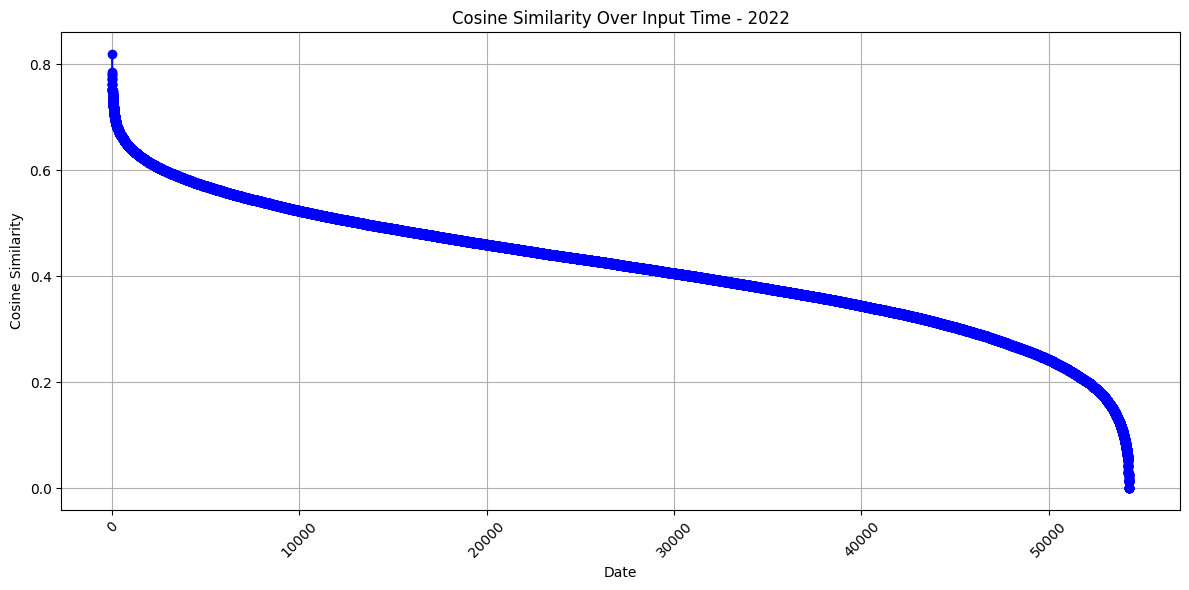

First row InputText:  Nesreče Na gorenjski avtocesti je oviran promet med priključkoma Kranj vzhod in Kranj zahod proti Karavankam. Ovire Na štajerski avtocesti je zaradi predmeta na vozišču oviran promet med priključkoma Lukovica in Blagovica proti Mariboru. Na štajerski avtocesti je zaradi okvare vozila oviran promet pred priključkom Šentrupert proti Ljubljani. Zastoji Zaradi jutranje prometne konice je promet povečan na mestnih obvoznicah in cestah, ki vodijo proti mestnim središčem. Veter BURJA - Na vipavski hitri cesti med Nanosom in Selom je prepovedan promet za počitniške prikolice, hladilnike in vozila s ponjavami, 2. stopnja . - Na regionalni cesti Razdrto - Podnanos - Manče - Vipava je prepovedan promet za počitniške prikolice, hladilnike in vozila s ponjavami do 8 ton, 1. stopnja . Zimske razmere Prepoved za priklopnike in polpriklopnike: - Na cesti Col - Črni Vrh. - Na hrvaški strani mejnih prehodov Babno Polje in Petrina. Cesta čez prelaz Vršič je prevozna za osebna vozila

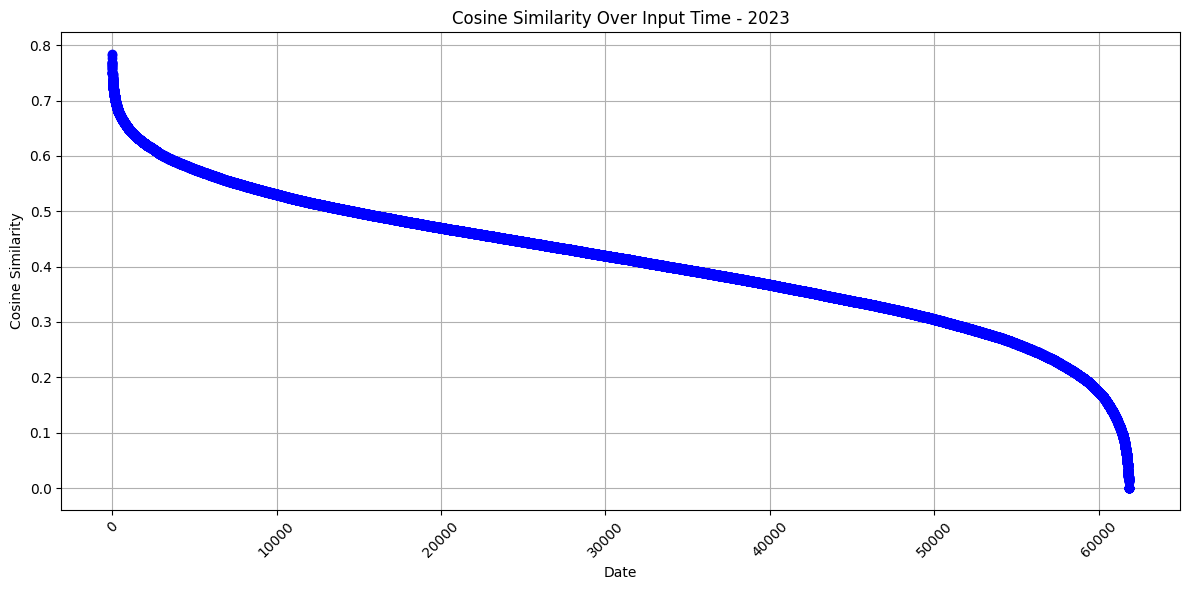

First row InputText:  Nesreče Na gorenjski avtocesti je zaprt prehitevalni pas med galerijo Moste in priključkom Lesce proti Ljubljani. Zastoji Na primorski avtocesti: - med priključkom Vrhniko in počivališčem Lom proti Kopru, zamuda več kot 1 uro in pol; - na izvozu Vrhnika iz smeri Ljubljane; - na uvozu Logatec proti Kopru. Za osebna vozila je obvoz možen po cesti Vrhnika - Logatec - Unec, kjer so prav tako zastoji na posameznih odsekih. Na gorenjski avtocesti med Brnikom in Vodicami proti Ljubljani, zamuda približno 15 minut. Na regionalni cesti Vransko - Trojane. Ovire Okvare vozil: - zaprt počasni pas na primorski avtocesti med Vrhniko in Logatcem proti Kopru; - oviran promet na pomurski avtocesti med Svetim Jurijem ob Ščavnici in Vučjo vasjo proti Murski Soboti; - oviran promet na dolenjski avtocesti med priključkoma Obrežje in Brežice proti Ljubljani. - oviran promet na štajerski avtocesti na izvozu Vransko iz smeri Ljubljane ter med Slovensko Bistrico sever in Polskavo proti Ma

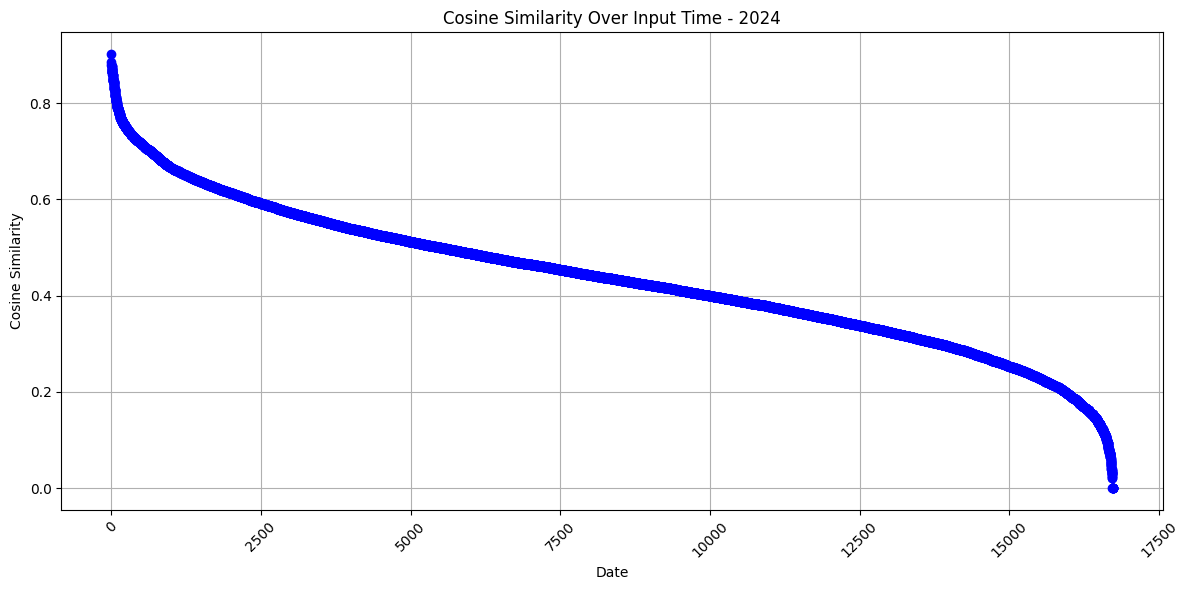

In [ ]:
# read cosine similarity data
cosine_similarity_data_2022 = pd.read_csv(folder_path + '/cos_sim_2022.csv', encoding='utf-8-sig')

# draw a graph of cosine similarity data (column CosineSimilarity) (each row has a different Datum and FilePath columns combination)

# change index 
def plot_cosine_similarity(data, year):
    plt.figure(figsize=(12, 6))
    #sort data by cosine similarity
    data = data.sort_values(by='CosineSimilarity', ascending=False)
    #print the InputText and OutputText of the first row and of the last row and one random row
    print("First row InputText: ", data.iloc[0]['InputText'])
    print("First row OutputText: ", data.iloc[0]['OutputText'])
    print("Last row InputText: ", data.iloc[-1]['InputText'])
    print("Last row OutputText: ", data.iloc[-1]['OutputText'])
    random_row = data.sample(n=1)
    print("Random row InputText: ", random_row.iloc[0]['InputText'])
    print("Random row OutputText: ", random_row.iloc[0]['OutputText'])
    # fix index column to have unique values
    data['index'] = range(len(data))
    plt.plot(data['index'], data['CosineSimilarity'], marker='o', linestyle='-', color='b')
    plt.title(f'Cosine Similarity Over Input Time - {year}')
    plt.xlabel('Date')
    plt.ylabel('Cosine Similarity')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'./Processed/cosine_similarity_{year}.png')
    plt.show()

# Plot cosine similarity for each year
plot_cosine_similarity(cosine_similarity_data_2022, 2022)
cosine_similarity_data_2023 = pd.read_csv('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/cos_sim_2023.csv', encoding='utf-8-sig')
plot_cosine_similarity(cosine_similarity_data_2023, 2023)
cosine_similarity_data_2024 = pd.read_csv('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/cos_sim_2024.csv', encoding='utf-8-sig')
plot_cosine_similarity(cosine_similarity_data_2024, 2024)



In [31]:
# merge cosine similarity with the cosine similarity of lemmatized data
def merge_cosine_similarity_data(year):
    # Read the cosine similarity data
    path = f'{folder_path}/cos_sim_{year}.csv'
    cosine_similarity_data = pd.read_csv(path, encoding='utf-8-sig')
    lemmatized_cosine_similarity_data = pd.read_csv(f'{folder_path}/lem_cos_sim_{year}.csv', encoding='utf-8-sig')
    print("column names in cosine similarity data: ", cosine_similarity_data.columns)
    print("column names in lemmatized cosine similarity data: ", lemmatized_cosine_similarity_data.columns)
    # Merge the two dataframes on 'FilePath' and 'Datetime', dont add the rows that are not in both dataframes
    # Use suffixes to differentiate between original and lemmatized cosine similarity
    merged_data = pd.merge(cosine_similarity_data, lemmatized_cosine_similarity_data, on=['FilePath', 'Datum'], how='inner', suffixes=('_original', '_lemmatized'))
    # Save the merged data to a new CSV file
    merged_data.to_csv(folder_path + f'/merged_cosine_similarity_{year}.csv', index=False, encoding='utf-8-sig')
    
    return merged_data

# Merge cosine similarity data for each year
merged_cosine_similarity_2022 = merge_cosine_similarity_data(2022)
merged_cosine_similarity_2023 = merge_cosine_similarity_data(2023)
merged_cosine_similarity_2024 = merge_cosine_similarity_data(2024)


column names in cosine similarity data:  Index(['Index', 'Datum', 'FilePath', 'InputText', 'OutputText', 'Input',
       'Output', 'IncludedInputKeys', 'CosineSimilarity'],
      dtype='object')
column names in lemmatized cosine similarity data:  Index(['Datum', 'FilePath', 'Input', 'Output', 'CosineSimilarity'], dtype='object')
column names in cosine similarity data:  Index(['Index', 'Datum', 'FilePath', 'InputText', 'OutputText', 'Input',
       'Output', 'IncludedInputKeys', 'CosineSimilarity'],
      dtype='object')
column names in lemmatized cosine similarity data:  Index(['Datum', 'FilePath', 'Input', 'Output', 'CosineSimilarity'], dtype='object')
column names in cosine similarity data:  Index(['Index', 'Datum', 'FilePath', 'InputText', 'OutputText', 'Input',
       'Output', 'IncludedInputKeys', 'CosineSimilarity'],
      dtype='object')
column names in lemmatized cosine similarity data:  Index(['Datum', 'FilePath', 'Input', 'Output', 'CosineSimilarity'], dtype='object')


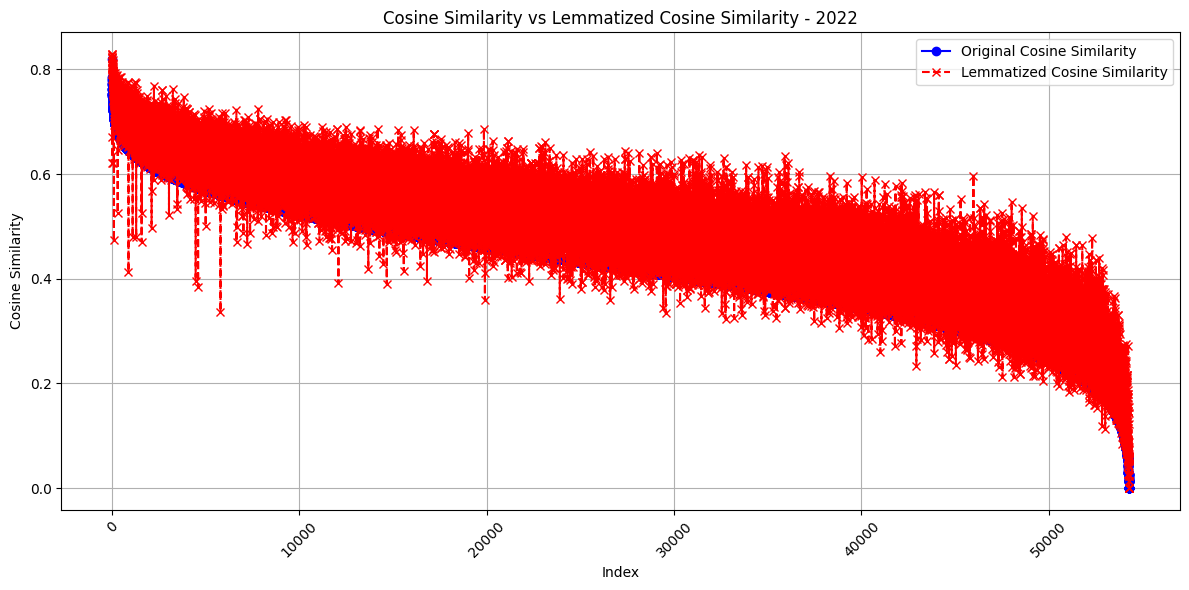

First row InputText (lemmatized):  Nesreče Oviran promet na štajerski avtocesti pred Slovenskimi Konjicami proti Ljubljani. Zastoji Na gorenjski avtocesti pred predorom Karavanke proti Avstriji, 9 kilometrov. Zaradi varnosti predor proti Avstriji občasno zapirajo. Zaprta sta izvoz Jesenice vzhod iz smeri Ljubljane, dovoljeno samo za lokalni promet ter uvoz Jesenice zahod proti Karavankam. Proti Kranjski Gori je možen izvoz Lesce, proti Avstriji pa Ljubelj, kjer pa je tudi zastoj. Zastoj je tudi iz smeri Avstrije proti Sloveniji, 5 kilometrov. Na gorenjski avtocesti med Brodom in Kosezami proti Ljubljani, občasno zapirajo predor Šentvid proti Brdu. Na zahodni ljubljanski obvoznici od predora Šentvid ter na južni ljubljanski obvoznici od priključka Rudnik proti razcepu Kozarje. Zastoj se nadaljuje po primorski avtocesti proti Vrhniki. Na cesti Tržič - Ljubelj proti Avstriji, predor Ljubelj občasno zapirajo. Na podravski avtocesti je zastoj tovornih vozil pred mejnim prehodom Gruškovje pr

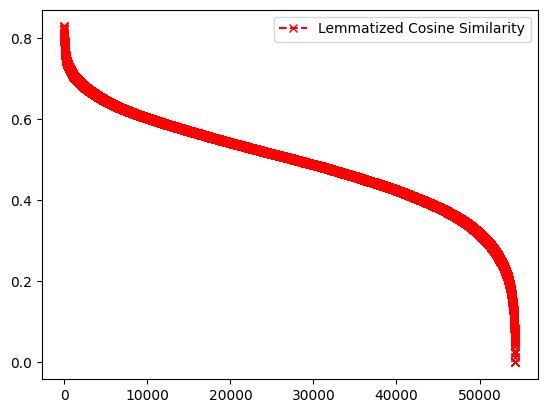

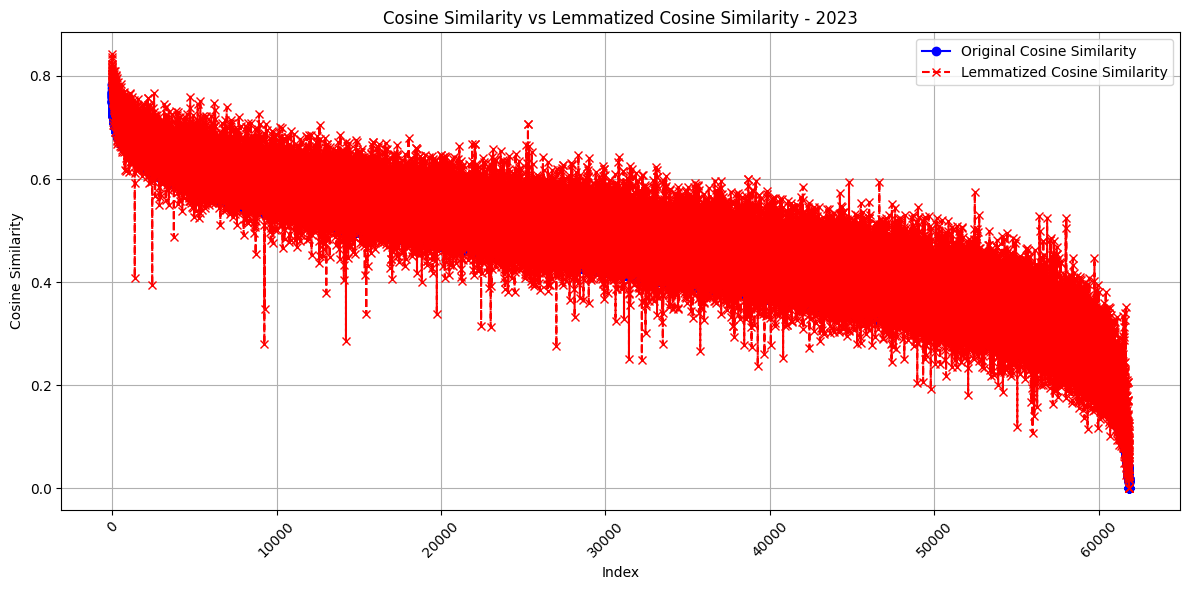

First row InputText (lemmatized):  Zastoji Promet je zaradi jutranje prometne konice povečan na cestah, ki vodijo v mestna središča ter na mestnih obvoznicah. Vreme Primorska avtocesta je zaradi močnega vetra zaprta med priključkoma Kastelec in Kozina proti Ljubljani. Zaprt je tudi uvoz Kastelec proti Ljubljani. Obvoz je po regionalni cesti. BURJA Prepovedan promet za počitniške prikolice, hladilnike, vozila s ponjavami in avtobuse, 3. stopnja; - na vipavski hitri cesti med razcepom Nanos in priključkom Selo; - na regionalni cesti Vipava - Ajdovščina. Prepovedan promet za počitniške prikolice, hladilnike in vozila s ponjavami do 8 ton, 1. stopnja; - na regionalni cesti Razdrto - Podnanos in Selo - Ajševica - Vogrsko. Cesta Smednik - Kostanjevica je zaprta zaradi poplavljenega vozišča pri Zameškem. Cesta Maribor - Pernica je zaradi plazu zaprta med Malečnikom in krožiščem pri avtocestnem priključku Pernica. Delo na cesti Več o delovnih zaporah v prometni napovedi . Primorska avtocesta j

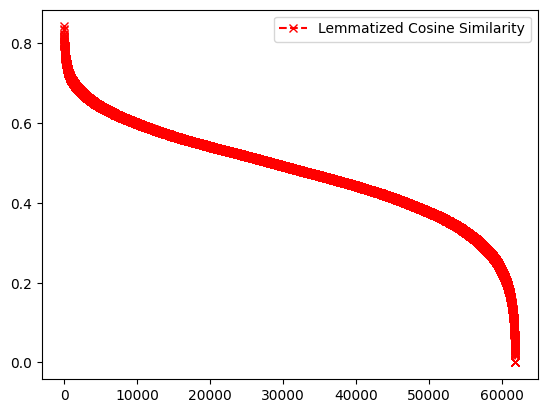

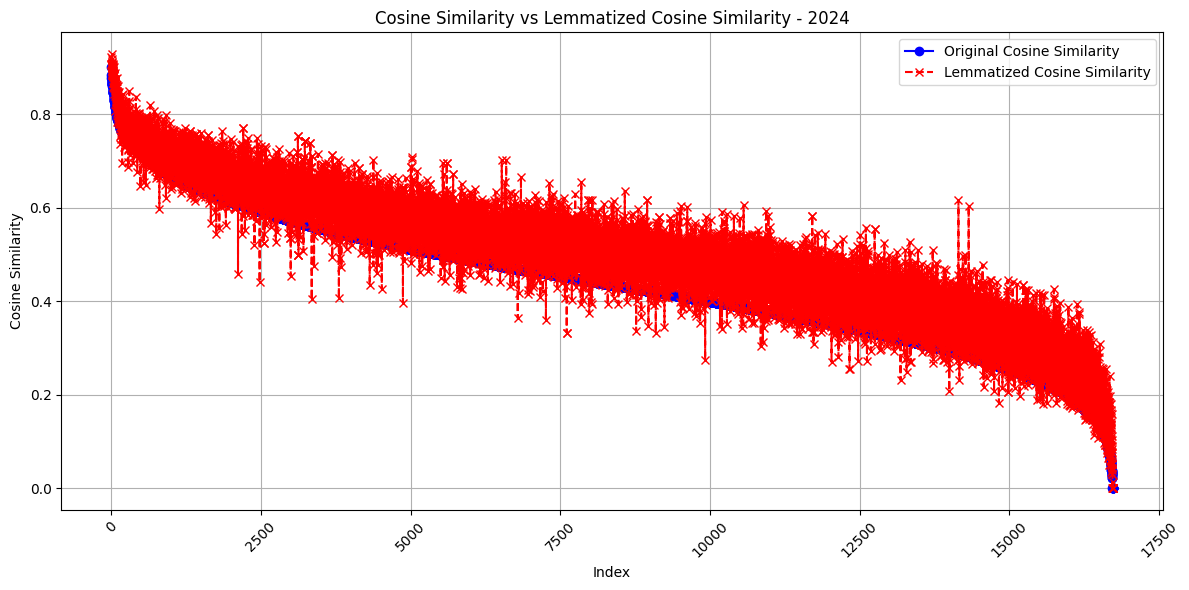

First row InputText (lemmatized):  Opozorila Zaradi napovedanih vremenskih razmer bo predvidoma po 22. uri tovornim vozilom prepovedano zapuščanje počivališč na avtocestah. Vreme Ponekod po Sloveniji že sneži, sneg se oprijema cestišč . Na cestah so plužne in posipne skupine, prehitevanje teh je prepovedano. Danes zvečer in ponoči lahko dodatne težave povzročajo tudi močnejši sunki burje na meji med Primorsko in Notranjsko. Vozniki tovornih vozil lahko pričakujejo izločanje. Pričakujte daljše potovalne čase in se na pot odpravite le z ustrezno zimsko opremo. Voznike opozarjamo, da je na prelazih v primeru snega obvezna uporaba verig. Zimske razmere : - Cesta čez prelaz Vršič je zaprta. - Na cesti Col - Črni Vrh - Godovič velja prepoved za priklopnike in polpriklopnike. - Obvezna uporaba verig je na avstrijski strani prelaza Korensko sedlo. Tovorna vozila Do 22. ure velja omejitev prometa tovornih vozil, katerih največja dovoljena masa presega 7,5 t. Delovne zapore Več o delovnih zapora

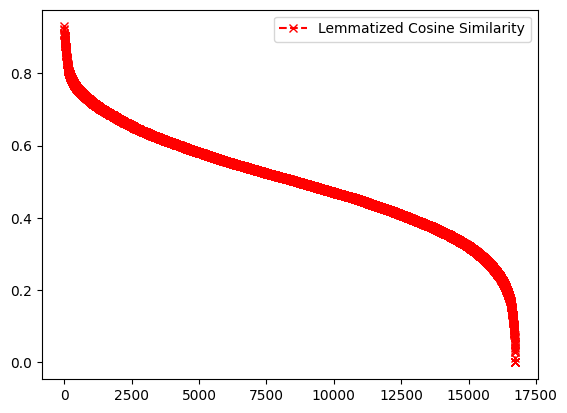

In [23]:

# plot the cosine similarity and lemmatized cosine similarity
def plot_cosine_similarity_and_lemmatized(data, year):
    plt.figure(figsize=(12, 6))
    # Sort data by cosine similarity
    data = data.sort_values(by='CosineSimilarity_original', ascending=False)
    
    # Fix index column to have unique values
    data['index'] = range(len(data))
    
    plt.plot(data['index'], data['CosineSimilarity_original'], marker='o', linestyle='-', color='b', label='Original Cosine Similarity')
    plt.plot(data['index'], data['CosineSimilarity_lemmatized'], marker='x', linestyle='--', color='r', label='Lemmatized Cosine Similarity')
    
    plt.title(f'Cosine Similarity vs Lemmatized Cosine Similarity - {year}')
    plt.xlabel('Index')
    plt.ylabel('Cosine Similarity')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{folder_path}/cosine_similarity_vs_lemmatized_{year}.png')
    plt.show()

    sort_by_lemmatized = data.sort_values(by='CosineSimilarity_lemmatized', ascending=False)
    sort_by_lemmatized['index'] = range(len(sort_by_lemmatized))
    print("First row InputText (lemmatized): ", sort_by_lemmatized.iloc[0]['InputText'])
    print("First row OutputText (lemmatized): ", sort_by_lemmatized.iloc[0]['OutputText'])
    print("Last row InputText (lemmatized): ", sort_by_lemmatized.iloc[-1]['InputText'])
    print("Last row OutputText (lemmatized): ", sort_by_lemmatized.iloc[-1]['OutputText'])
    random_row = sort_by_lemmatized.sample(n=1)
    print("Random row InputText (lemmatized): ", random_row.iloc[0]['InputText'])
    print("Random row OutputText (lemmatized): ", random_row.iloc[0]['OutputText'])
    
    plt.plot(sort_by_lemmatized['index'], sort_by_lemmatized['CosineSimilarity_lemmatized'], marker='x', linestyle='--', color='r', label='Lemmatized Cosine Similarity')
    plt.legend()
    plt.savefig(f'{folder_path}/cosine_lemmatized_{year}.png')
    plt.show()

# Plot cosine similarity and lemmatized cosine similarity for each year
plot_cosine_similarity_and_lemmatized(merged_cosine_similarity_2022, 2022)
plot_cosine_similarity_and_lemmatized(merged_cosine_similarity_2023, 2023)
plot_cosine_similarity_and_lemmatized(merged_cosine_similarity_2024, 2024)

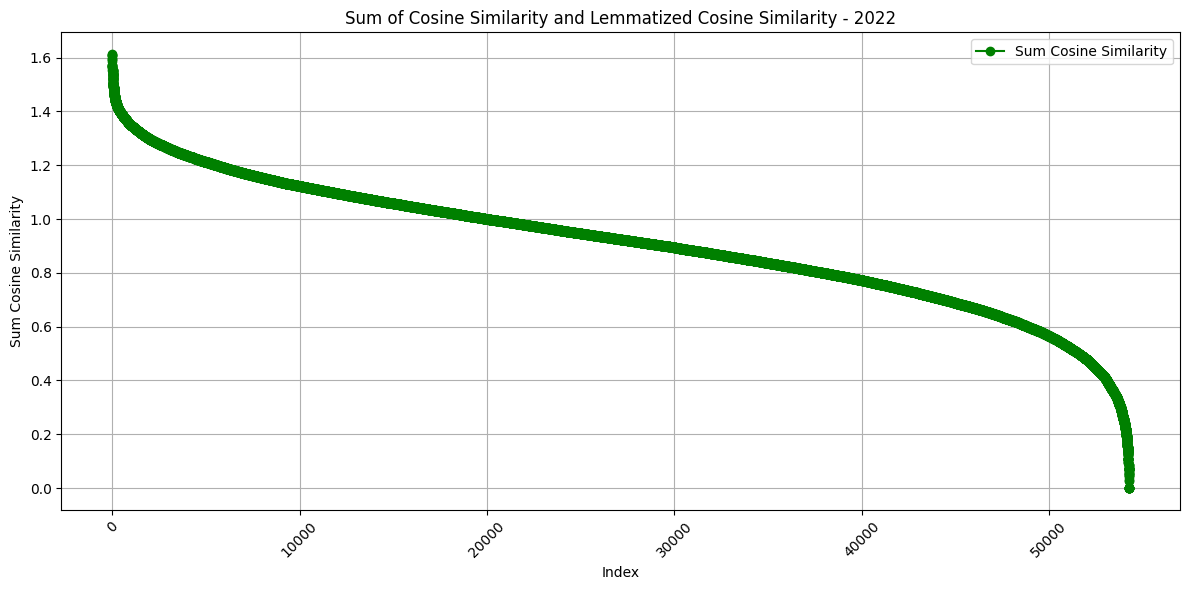

First row InputText:  Nesreče Oviran promet na štajerski avtocesti pred Slovenskimi Konjicami proti Ljubljani. Zastoji Na gorenjski avtocesti pred predorom Karavanke proti Avstriji, 9 kilometrov. Zaradi varnosti predor proti Avstriji občasno zapirajo. Zaprta sta izvoz Jesenice vzhod iz smeri Ljubljane, dovoljeno samo za lokalni promet ter uvoz Jesenice zahod proti Karavankam. Proti Kranjski Gori je možen izvoz Lesce, proti Avstriji pa Ljubelj, kjer pa je tudi zastoj. Zastoj je tudi iz smeri Avstrije proti Sloveniji, 5 kilometrov. Na gorenjski avtocesti med Brodom in Kosezami proti Ljubljani, občasno zapirajo predor Šentvid proti Brdu. Na zahodni ljubljanski obvoznici od predora Šentvid ter na južni ljubljanski obvoznici od priključka Rudnik proti razcepu Kozarje. Zastoj se nadaljuje po primorski avtocesti proti Vrhniki. Na cesti Tržič - Ljubelj proti Avstriji, predor Ljubelj občasno zapirajo. Na podravski avtocesti je zastoj tovornih vozil pred mejnim prehodom Gruškovje proti Hrvaški. 

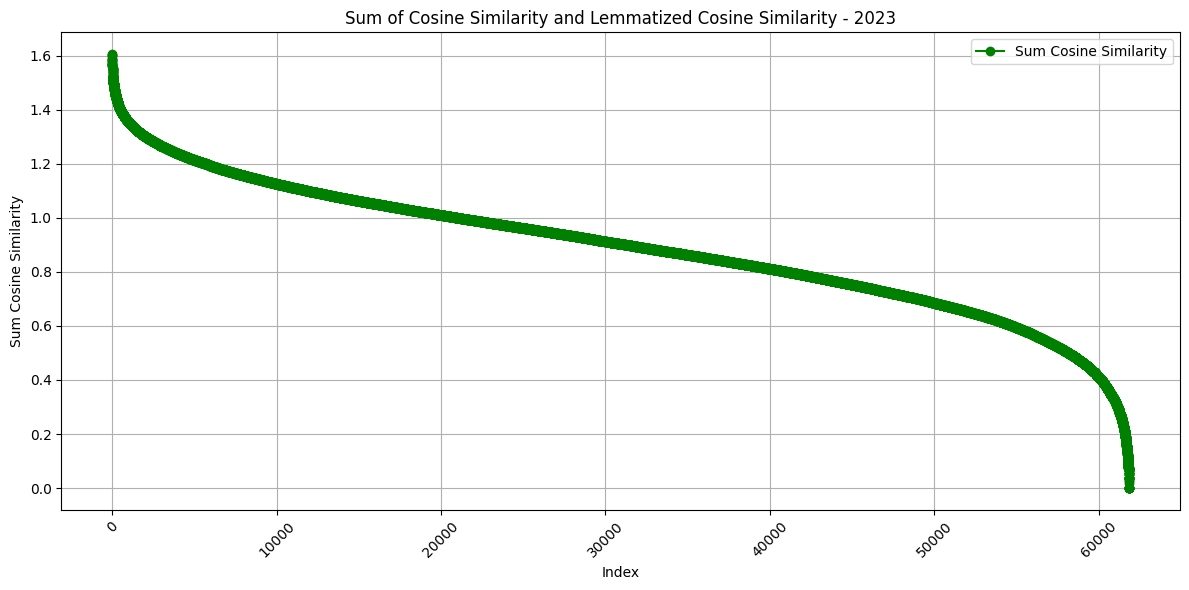

First row InputText:  Nesreče Na gorenjski avtocesti je oviran promet med priključkoma Kranj vzhod in Kranj zahod proti Karavankam. Ovire Na štajerski avtocesti je zaradi predmeta na vozišču oviran promet med priključkoma Lukovica in Blagovica proti Mariboru. Na štajerski avtocesti je zaradi okvare vozila oviran promet pred priključkom Šentrupert proti Ljubljani. Zastoji Zaradi jutranje prometne konice je promet povečan na mestnih obvoznicah in cestah, ki vodijo proti mestnim središčem. Veter BURJA - Na vipavski hitri cesti med Nanosom in Selom je prepovedan promet za počitniške prikolice, hladilnike in vozila s ponjavami, 2. stopnja . - Na regionalni cesti Razdrto - Podnanos - Manče - Vipava je prepovedan promet za počitniške prikolice, hladilnike in vozila s ponjavami do 8 ton, 1. stopnja . Zimske razmere Prepoved za priklopnike in polpriklopnike: - Na cesti Col - Črni Vrh. - Na hrvaški strani mejnih prehodov Babno Polje in Petrina. Cesta čez prelaz Vršič je prevozna za osebna vozila

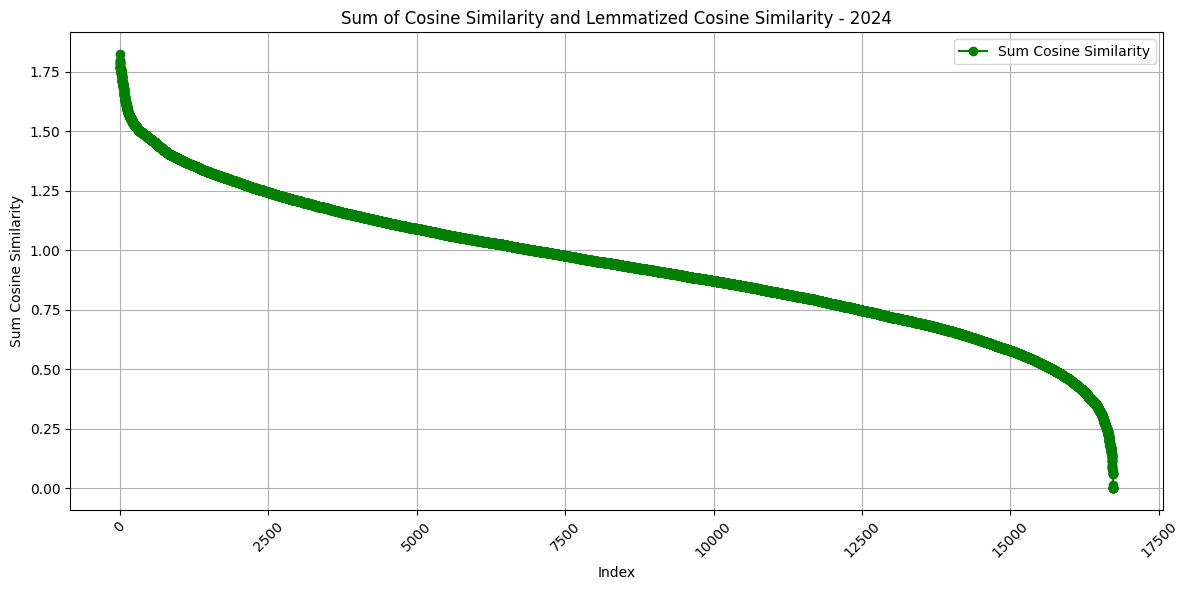

First row InputText:  Nesreče Na gorenjski avtocesti je zaprt prehitevalni pas med galerijo Moste in priključkom Lesce proti Ljubljani. Zastoji Na primorski avtocesti: - med priključkom Vrhniko in počivališčem Lom proti Kopru, zamuda več kot 1 uro in pol; - na izvozu Vrhnika iz smeri Ljubljane; - na uvozu Logatec proti Kopru. Za osebna vozila je obvoz možen po cesti Vrhnika - Logatec - Unec, kjer so prav tako zastoji na posameznih odsekih. Na gorenjski avtocesti med Brnikom in Vodicami proti Ljubljani, zamuda približno 15 minut. Na regionalni cesti Vransko - Trojane. Ovire Okvare vozil: - zaprt počasni pas na primorski avtocesti med Vrhniko in Logatcem proti Kopru; - oviran promet na pomurski avtocesti med Svetim Jurijem ob Ščavnici in Vučjo vasjo proti Murski Soboti; - oviran promet na dolenjski avtocesti med priključkoma Obrežje in Brežice proti Ljubljani. - oviran promet na štajerski avtocesti na izvozu Vransko iz smeri Ljubljane ter med Slovensko Bistrico sever in Polskavo proti Ma

In [24]:
def plot_sum_cos_similarity(data, year):
    # sum the cosine similarity and lemmatized cosine similarity
    data['SumCosineSimilarity'] = data['CosineSimilarity_original'] + data['CosineSimilarity_lemmatized']
    plt.figure(figsize=(12, 6))
    # Sort data by sum cosine similarity
    data = data.sort_values(by='SumCosineSimilarity', ascending=False)
    # Fix index column to have unique values
    data['index'] = range(len(data))
    plt.plot(data['index'], data['SumCosineSimilarity'], marker='o', linestyle='-', color='g', label='Sum Cosine Similarity')
    plt.title(f'Sum of Cosine Similarity and Lemmatized Cosine Similarity - {year}')
    plt.xlabel('Index')
    plt.ylabel('Sum Cosine Similarity')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{folder_path}/sum_cosine_similarity_{year}.png')
    plt.show()

    # Print the first, last, and a random row's InputText and OutputText
    print("First row InputText: ", data.iloc[0]['InputText'])
    print("First row OutputText: ", data.iloc[0]['OutputText'])
    print("Last row InputText: ", data.iloc[-1]['InputText'])
    print("Last row OutputText: ", data.iloc[-1]['OutputText'])
    random_row = data.sample(n=1)
    print("Random row InputText: ", random_row.iloc[0]['InputText'])
    print("Random row OutputText: ", random_row.iloc[0]['OutputText'])

# Plot sum of cosine similarity and lemmatized cosine similarity for each year
plot_sum_cos_similarity(merged_cosine_similarity_2022, 2022)
plot_sum_cos_similarity(merged_cosine_similarity_2023, 2023)
plot_sum_cos_similarity(merged_cosine_similarity_2024, 2024)

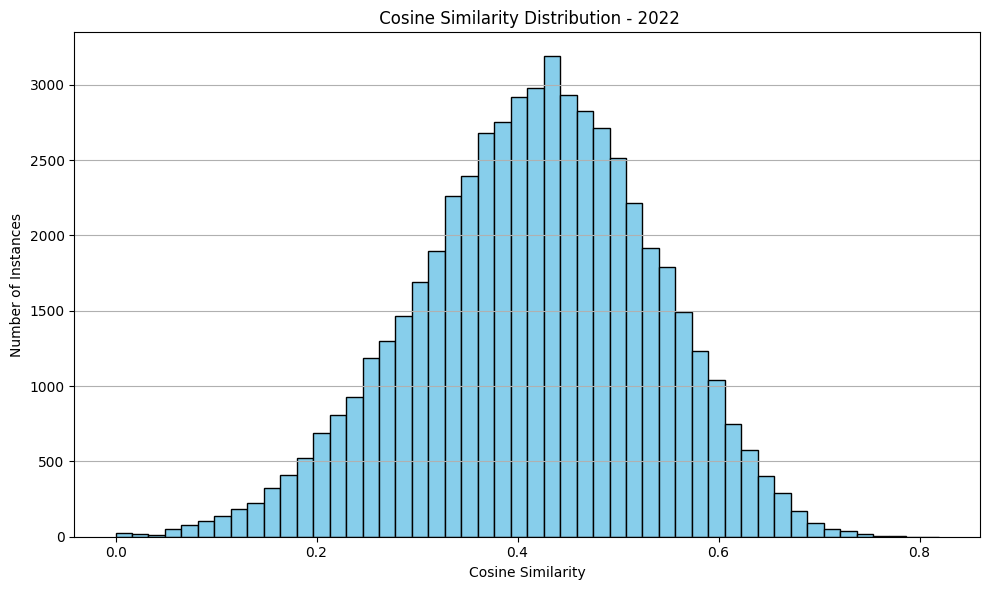

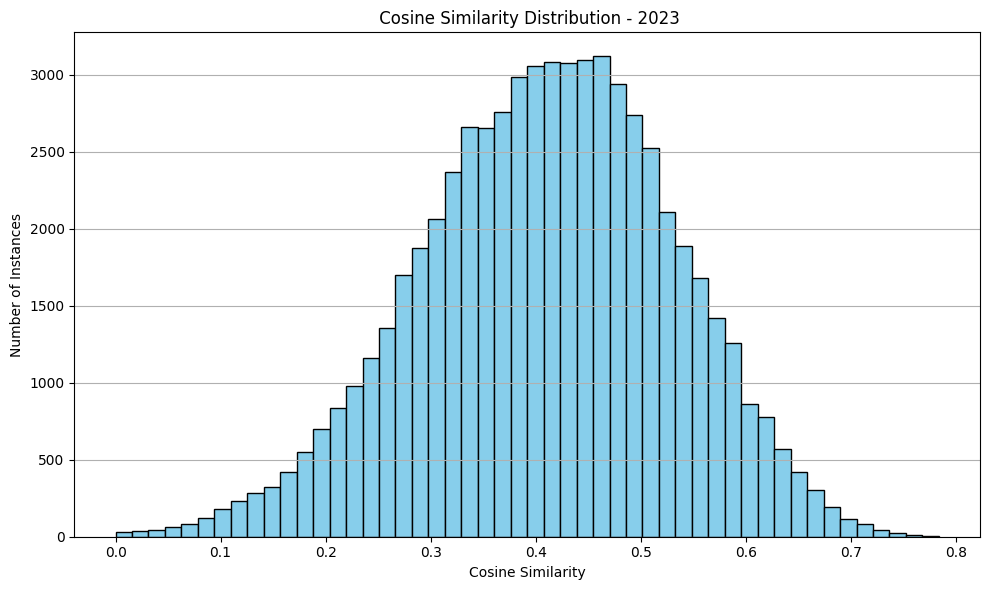

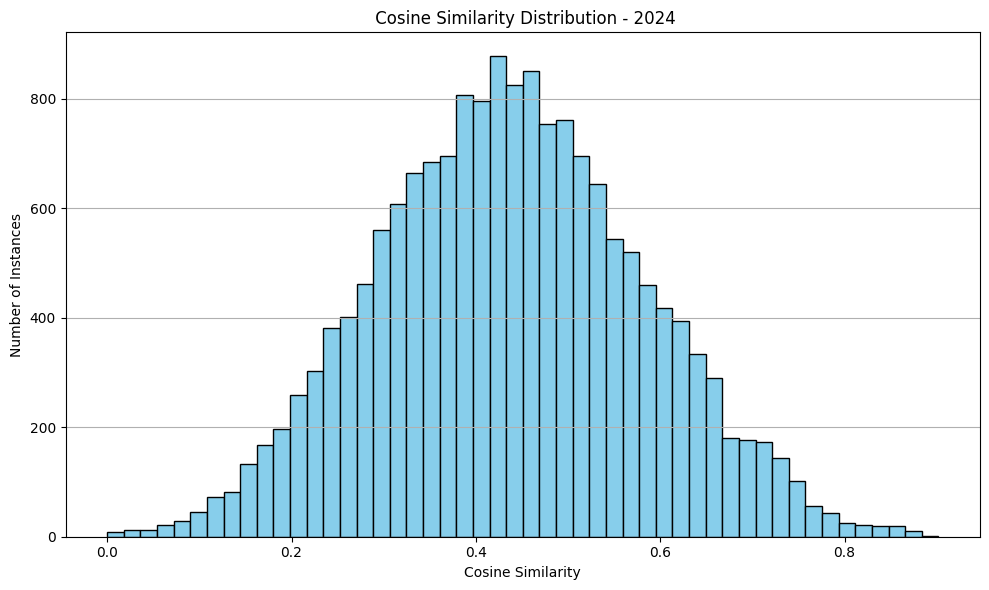

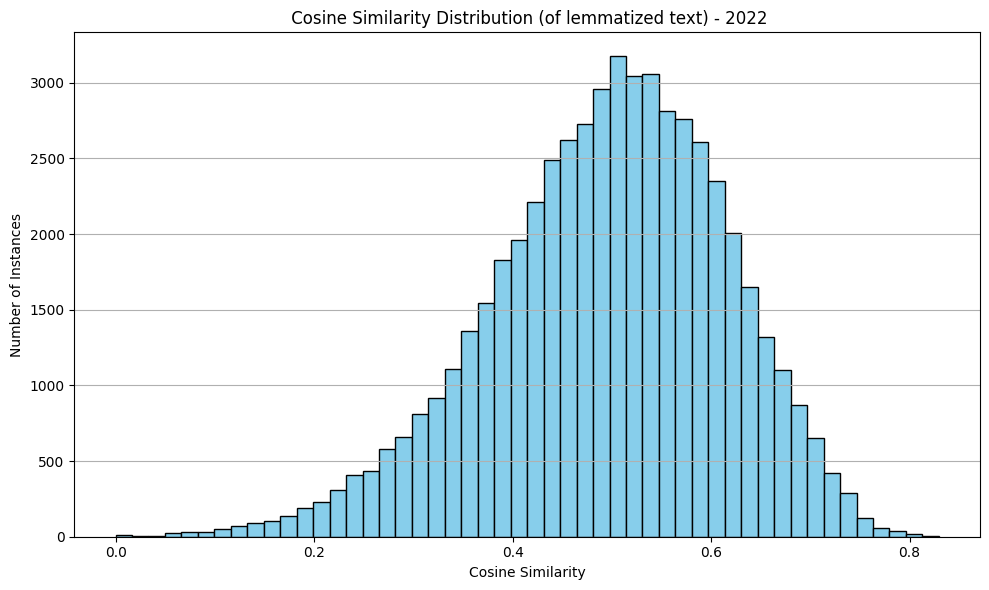

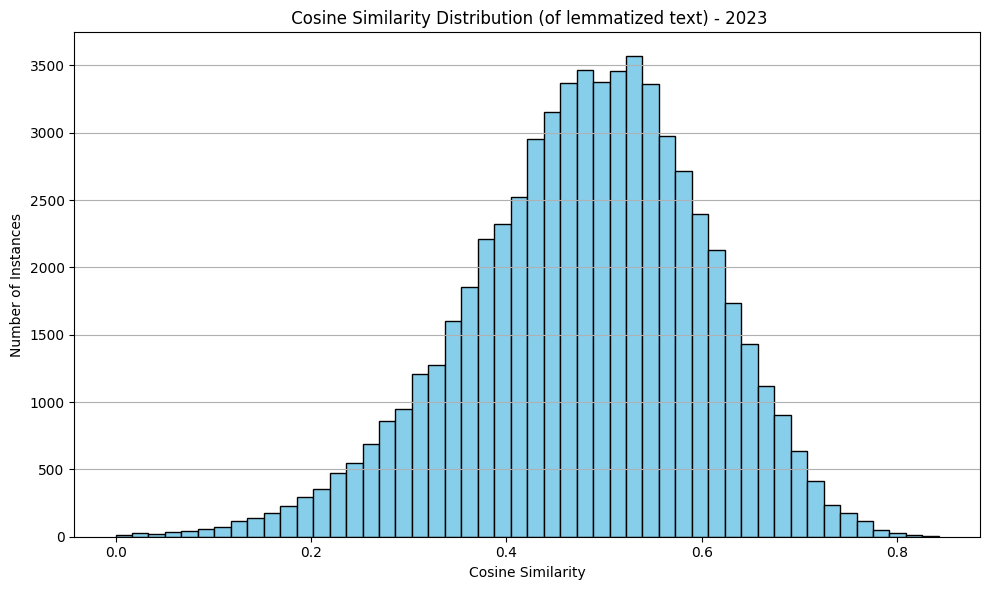

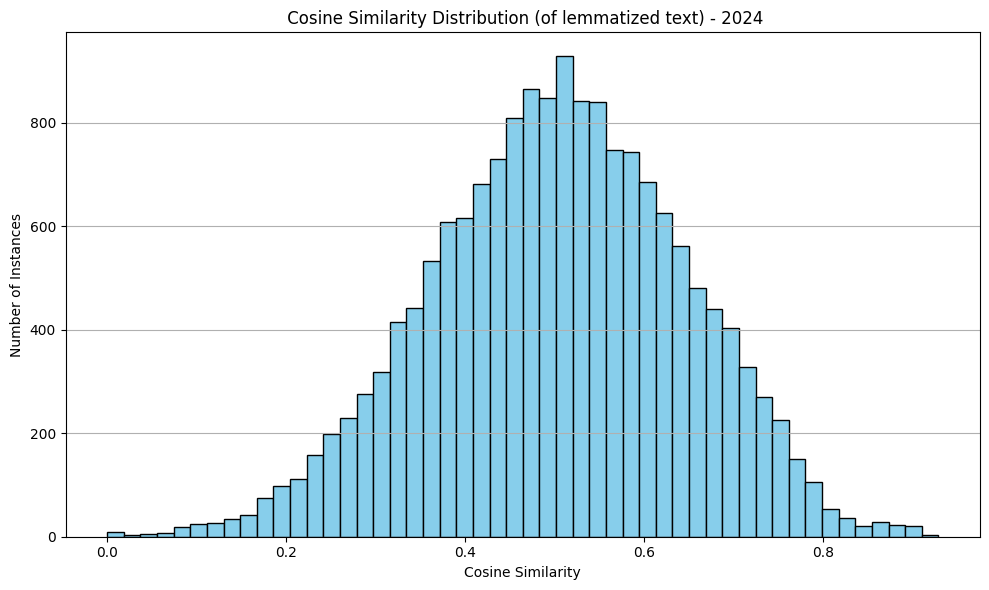

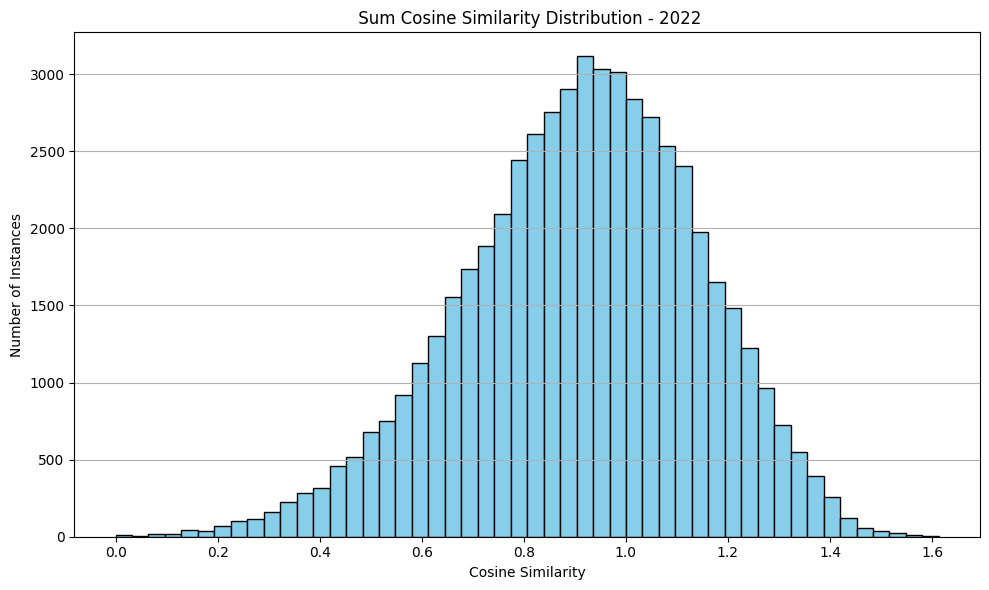

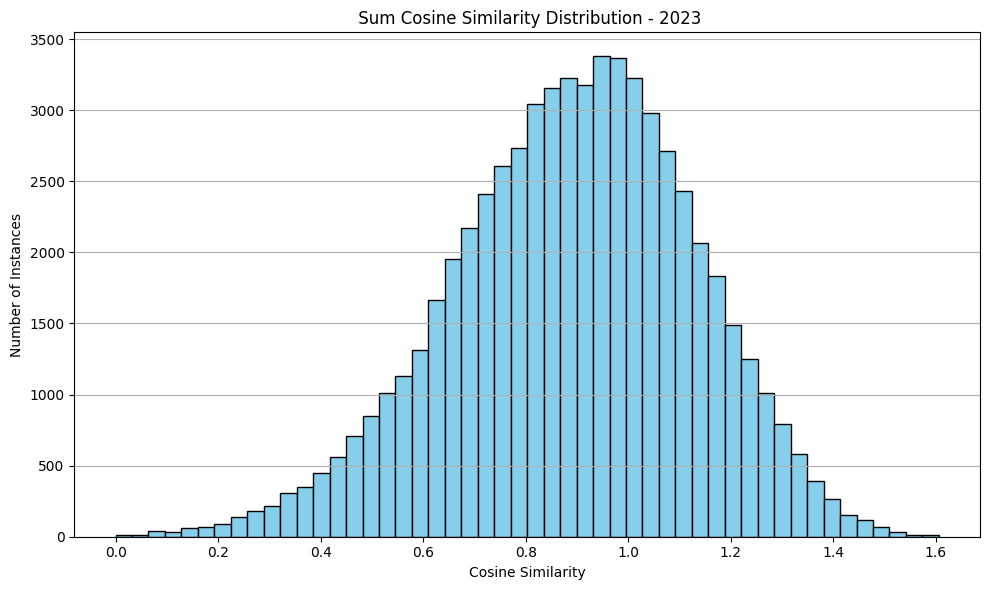

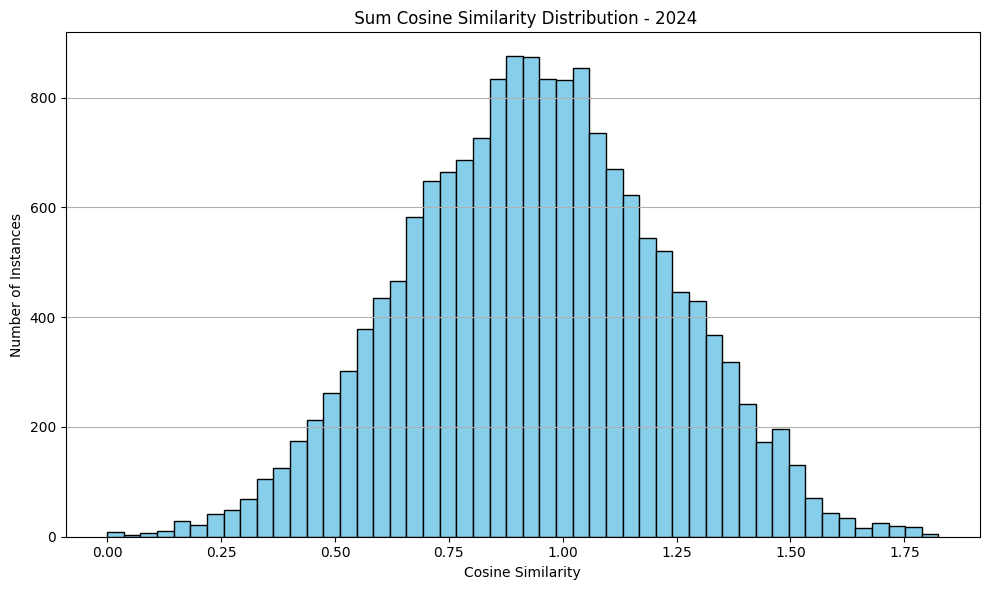

In [26]:

def plot_cosine_similarity_distribution(data, year, out_path, column='CosineSimilarity_original', title='Cosine Similarity Distribution', xlabel='Cosine Similarity'):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=50, color='skyblue', edgecolor='black')
    plt.title(f' {title} - {year}')
    plt.xlabel(xlabel)
    plt.ylabel('Number of Instances')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(out_path)
    plt.show()

# Plot cosine similarity distribution for each year
plot_cosine_similarity_distribution(merged_cosine_similarity_2022, 2022, f'{folder_path}/cos_sim_distribution_2022.png')
plot_cosine_similarity_distribution(merged_cosine_similarity_2023, 2023, f'{folder_path}/cos_sim_distribution_2023.png')
plot_cosine_similarity_distribution(merged_cosine_similarity_2024, 2024, f'{folder_path}/cos_sim_distribution_2024.png')

# plot lemmatized cosine similarity distribution for each year
plot_cosine_similarity_distribution(merged_cosine_similarity_2022, 2022, f'{folder_path}/lem_cos_sim_distribution_2022.png', column='CosineSimilarity_lemmatized', title='Cosine Similarity Distribution (of lemmatized text)')
plot_cosine_similarity_distribution(merged_cosine_similarity_2023, 2023, f'{folder_path}/lem_cos_sim_distribution_2023.png', column='CosineSimilarity_lemmatized', title='Cosine Similarity Distribution (of lemmatized text)')
plot_cosine_similarity_distribution(merged_cosine_similarity_2024, 2024, f'{folder_path}/lem_cos_sim_distribution_2024.png', column='CosineSimilarity_lemmatized', title='Cosine Similarity Distribution (of lemmatized text)')
# plot sum cosine similarity distribution for each year
sum_cosine_similarity_2022 = merged_cosine_similarity_2022.copy()
sum_cosine_similarity_2022['SumCosineSimilarity'] = sum_cosine_similarity_2022['CosineSimilarity_original'] + sum_cosine_similarity_2022['CosineSimilarity_lemmatized']
plot_cosine_similarity_distribution(sum_cosine_similarity_2022, 2022, f'{folder_path}/sum_cos_sim_distribution_2022.png', column='SumCosineSimilarity', title='Sum Cosine Similarity Distribution')
sum_cosine_similarity_2023 = merged_cosine_similarity_2023.copy()
sum_cosine_similarity_2023['SumCosineSimilarity'] = sum_cosine_similarity_2023['CosineSimilarity_original'] + sum_cosine_similarity_2023['CosineSimilarity_lemmatized']
plot_cosine_similarity_distribution(sum_cosine_similarity_2023, 2023, f'{folder_path}/sum_cos_sim_distribution_2023.png', column='SumCosineSimilarity', title='Sum Cosine Similarity Distribution')
sum_cosine_similarity_2024 = merged_cosine_similarity_2024.copy()
sum_cosine_similarity_2024['SumCosineSimilarity'] = sum_cosine_similarity_2024['CosineSimilarity_original'] + sum_cosine_similarity_2024['CosineSimilarity_lemmatized']
plot_cosine_similarity_distribution(sum_cosine_similarity_2024, 2024, f'{folder_path}/sum_cos_sim_distribution_2024.png', column='SumCosineSimilarity', title='Sum Cosine Similarity Distribution')

In [8]:
# lets find a threshold for the sum of cosine similarity
def find_threshold(data, year):
    # Calculate sum of cosine similarity and lemmatized cosine similarity
    data['SumCosineSimilarity'] = data['CosineSimilarity_original'] + data['CosineSimilarity_lemmatized']
    # Calculate the mean and standard deviation of the sum of cosine similarity
    mean = data['SumCosineSimilarity'].mean()
    std_dev = data['SumCosineSimilarity'].std()
    
    # print a row that is around possible threshold for each possible threshold
    threshold = mean  # Example threshold: mean
    print(f"Possible threshold for {year} (mean): {threshold}")
    print("Example row around threshold:")
    example_row = data[(data['SumCosineSimilarity'] >= threshold - 0.1) & (data['SumCosineSimilarity'] <= threshold + 0.1)]
    if not example_row.empty:
        in_text = example_row.iloc[0]['InputText']
        out_text = example_row.iloc[0]['OutputText']
        print(f"InputText: {in_text}\nOutputText: {out_text}\nSumCosineSimilarity: {example_row.iloc[0]['SumCosineSimilarity']}")
    else:
        print("No example row found around the threshold.")
    
    threshold = mean + std_dev  # Example threshold: mean + std_dev
    print(f"Possible threshold for {year} (mean + std_dev): {threshold}")
    print("Example row around threshold:")
    example_row = data[(data['SumCosineSimilarity'] >= threshold - 0.1) & (data['SumCosineSimilarity'] <= threshold + 0.1)]
    if not example_row.empty:
        in_text = example_row.iloc[0]['InputText']
        out_text = example_row.iloc[0]['OutputText']
        print(f"InputText: {in_text}\nOutputText: {out_text}\nSumCosineSimilarity: {example_row.iloc[0]['SumCosineSimilarity']}")
    else:
        print("No example row found around the threshold.")
    
    threshold = mean - std_dev  # Example threshold: mean - std_dev
    print(f"Possible threshold for {year} (mean - std_dev): {threshold}")
    print("Example row around threshold:")
    example_row = data[(data['SumCosineSimilarity'] >= threshold - 0.1) & (data['SumCosineSimilarity'] <= threshold + 0.1)]
    if not example_row.empty:
        in_text = example_row.iloc[0]['InputText']
        out_text = example_row.iloc[0]['OutputText']
        print(f"InputText: {in_text}\nOutputText: {out_text}\nSumCosineSimilarity: {example_row.iloc[0]['SumCosineSimilarity']}")
    else:
        print("No example row found around the threshold.")

    threshold = mean + 2 * std_dev  # Example threshold: mean + 2 * std_dev
    print(f"Possible threshold for {year} (mean + 2 * std_dev): {threshold}")
    print("Example row around threshold:")
    example_row = data[(data['SumCosineSimilarity'] >= threshold - 0.1) & (data['SumCosineSimilarity'] <= threshold + 0.1)]
    if not example_row.empty:
        in_text = example_row.iloc[0]['InputText']
        out_text = example_row.iloc[0]['OutputText']
        print(f"InputText: {in_text}\nOutputText: {out_text}\nSumCosineSimilarity: {example_row.iloc[0]['SumCosineSimilarity']}")
    else:
        print("No example row found around the threshold.")
    
    threshold = mean - 2 * std_dev  # Example threshold: mean - 2 * std_dev
    print(f"Possible threshold for {year} (mean - 2 * std_dev): {threshold}")
    print("Example row around threshold:")
    example_row = data[(data['SumCosineSimilarity'] >= threshold - 0.1) & (data['SumCosineSimilarity'] <= threshold + 0.1)]
    if not example_row.empty:
        in_text = example_row.iloc[0]['InputText']
        out_text = example_row.iloc[0]['OutputText']
        print(f"InputText: {in_text}\nOutputText: {out_text}\nSumCosineSimilarity: {example_row.iloc[0]['SumCosineSimilarity']}")
    else:
        print("No example row found around the threshold.")
    threshold = mean - 3 * std_dev 
    print(f"Possible threshold for {year} (mean - 3 * std_dev): {threshold}")
    print("Example row around threshold:")
    example_row = data[(data['SumCosineSimilarity'] >= threshold - 0.1) & (data['SumCosineSimilarity'] <= threshold + 0.1)]
    if not example_row.empty:
        in_text = example_row.iloc[0]['InputText']
        out_text = example_row.iloc[0]['OutputText']
        print(f"InputText: {in_text}\nOutputText: {out_text}\nSumCosineSimilarity: {example_row.iloc[0]['SumCosineSimilarity']}")
    else:
        print("No example row found around the threshold.")
    
    return mean, std_dev
    
    

In [9]:
mean_2022, std_dev_2022 = find_threshold(merged_cosine_similarity_2022, 2022)

Possible threshold for 2022 (mean): 0.9106421476847217
Example row around threshold:
InputText: Nesreče Zaradi gorečega vozila je zaprt vozni pas na gorenjski avtocesti med priključkom Brezje in predorom Ljubno proti Ljubljani. Vreme Ponekod v osrednji Sloveniji megla v pasovih zmanjšuje vidljivost. Omejitve za tovorna vozila Po Sloveniji velja med prazniki omejitev za tovorna vozila z največjo dovoljeno maso nad 7,5 ton: - danes do 22. ure; - v nedeljo, 2. januarja, od 8. do 22. ure. Od 30. decembra je v veljavi sprememba omejitve za tovorna vozila nad 7,5 ton. Več. Zaradi gorečega vozila je zaprt vozni pas na gorenjski avtocesti med priključkom Brezje in predorom Ljubno proti Ljubljani.
OutputText: 
Podatki o prometu.

Na gorenjski avtocesti proti Ljubljani je zaradi gorečega vozila zaprt vozni pas med priključkoma Brezje in Podtabor.   

Zaradi del je na vzhodni mariborski obvoznici v obe smeri zaprt prehitevalni pas med razcepom Dragučova in priključkom Pesnica.

SumCosineSimilarit

In [10]:
mean_2023, std_dev_2023 = find_threshold(merged_cosine_similarity_2023, 2023)

Possible threshold for 2023 (mean): 0.8904642092456924
Example row around threshold:
InputText: Ovire V Kranju je zaradi požara zaprto krožišče na Koroški in Bleiweisovi cesti. Pnevmatika na vozišču ovira promet na primorski avtocesti med priključkom Divača in razcepom Gabrk proti Ljubljani. Delo na cesti Zaprta bo štajerska avtocesta med Blagovico in Vranskim proti Mariboru od nedelje, 15. 1. od 5. ure, do ponedeljka, 16. 1. do 5. ure. Zaprt bo tudi uvoz Trojane v smeri Ljubljane in Maribora. Na primorski hitri cesti je zaprt izvoz na priključku Semedela iz smeri Izole proti Kopru. Obvoz, tudi za vozila brez vinjete, je iz smeri Izole do priključka Koper. Na cesti Podtabor - Ljubelj, v Tržiču pri predorih, je zaradi sanacije plazu promet možen samo za lokalni promet. Več o delovnih zaporah v prometni napovedi. Opozorila Na meji s Hrvaško ni več mejnega nadzora . Vozite previdno, saj se na prehodih še vedno lahko pojavijo počasna ali stoječa vozila. V Kranju je zaradi požara zaprto kro

In [11]:
mean_2024, std_dev_2024 = find_threshold(merged_cosine_similarity_2024, 2024)

Possible threshold for 2024 (mean): 0.9399297257018723
Example row around threshold:
InputText: Nesreče Na štajerski avtocesti je pred počivališčem Dobrenje proti Šentilju oviran promet. Na ljubljanski severni obvoznici je pred priključkom Tomačevo zaprt prehitevalni pas proti Kosezam. Ovire Na primorski avtocesti je pred počivališčem Lom proti Ljubljani promet oviran, predmet. Tovorna vozila Zaradi praznikov velja omejitev prometa tovornih vozil, katerih največja dovoljena masa presega 7,5 t: - danes, do 22. ure; - v torek, 2. januarja, od 8. do 22. ure. Vreme Na cesti čez prelaz Vršič so obvezne verige. Voznike opozarjamo, da je na prelazih (ali: na nekaterih višjeležečih cestah) v primeru snega obvezna uporaba verig. Delo na cesti Več o delovnih zaporah v prometni napovedi . Želimo vam srečno in varno na cestah v letu 2024! Na primorski avtocesti je pred počivališčem Lom proti Ljubljani promet oviran, predmet.
OutputText: 
Podatki o prometu.

Zaradi pokvarjenega vozila je na štajers

In [ ]:
def create_inout_json(data, threshold, json_filepath):
    # create json where each entry has 'input' and 'output' fields
    # input is list of all those that were in 'Input' for the same output ('FilePath' field) and are above the threshold
    inout_json = []
    # we want the inout json to be sorted by the sum of all inputs' in the list for output cosine similarity
    # for each unique FilePath, create an entry in the inout_json
    unique_filepaths = data['FilePath'].unique()
    for filepath in unique_filepaths:
        # get all rows for this filepath
        rows = data[data['FilePath'] == filepath]
        # check for duplicate outputs by 'Datetime' field
        # keep the one that has NOVA in the 'TitleCategory' field

        # filter rows by threshold
        filtered_rows = rows[rows['SumCosineSimilarity'] > threshold]
        if not filtered_rows.empty:
            # create input list from the filtered rows (input is in the 'Input' field)
            input_list = filtered_rows['Input_original'].tolist()
            
            # calculate the sum of cosine similarity for the filtered rows
            mean_input_cosine = filtered_rows['SumCosineSimilarity'].mean()
            # create output dict
            # output is in the 'Output' field
            output = filtered_rows.iloc[0]['Output_original']
            inout_json.append((mean_input_cosine,{
                'input': input_list,
                'output': output
            }))
    
    
    # sort the inout_json by the sum of cosine similarity from highest to lowest
    inout_json.sort(key=lambda x: x[0], reverse=True)
    # remove the sum of cosine similarity from the inout_json
    inout_json = [{'input': item[1]['input'], 'output': item[1]['output']} for item in inout_json]
    # save the inout_json to a file
    with open(json_filepath, 'w', encoding='utf-8') as f:
        json.dump(inout_json, f, ensure_ascii=False, indent=4)
    print(f"Saved inout JSON to {json_filepath}")
    

In [45]:
create_inout_json(merged_cosine_similarity_2022, mean_2022 - 2 * std_dev_2022, f'{folder_path}/inout_mean-2std_2022.json')
create_inout_json(merged_cosine_similarity_2023, mean_2023 - 2 * std_dev_2023, f'{folder_path}/inout_mean-2std_2023.json')
create_inout_json(merged_cosine_similarity_2024, mean_2024 - 2 * std_dev_2024, f'{folder_path}/inout_mean-2std_2024.json')

create_inout_json(merged_cosine_similarity_2022, mean_2022 - 3 * std_dev_2022, f'{folder_path}/inout_mean-3std_2022.json')
create_inout_json(merged_cosine_similarity_2023, mean_2023 - 3 * std_dev_2023, f'{folder_path}/inout_mean-3std_2023.json')
create_inout_json(merged_cosine_similarity_2024, mean_2024 - 3 * std_dev_2024, f'{folder_path}/inout_mean-3std_2024.json')

create_inout_json(merged_cosine_similarity_2022, mean_2022 + 2 * std_dev_2022, f'{folder_path}/inout_mean+2std_2022.json')
create_inout_json(merged_cosine_similarity_2023, mean_2023 + 2 * std_dev_2023, f'{folder_path}/inout_mean+2std_2023.json')
create_inout_json(merged_cosine_similarity_2024, mean_2024 + 2 * std_dev_2024, f'{folder_path}/inout_mean+2std_2024.json')

create_inout_json(merged_cosine_similarity_2022, mean_2022 + std_dev_2022, f'{folder_path}/inout_mean+std_2022.json')
create_inout_json(merged_cosine_similarity_2023, mean_2023 + std_dev_2023, f'{folder_path}/inout_mean+std_2023.json')
create_inout_json(merged_cosine_similarity_2024, mean_2024 + std_dev_2024, f'{folder_path}/inout_mean+std_2024.json')

create_inout_json(merged_cosine_similarity_2022, mean_2022, f'{folder_path}/inout_mean+2std_2022.json')
create_inout_json(merged_cosine_similarity_2023, mean_2023, f'{folder_path}/inout_mean+2std_2023.json')
create_inout_json(merged_cosine_similarity_2024, mean_2024, f'{folder_path}/inout_mean+2std_2024.json')





Saved inout JSON to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/inout_mean-2std_2022.json
Saved inout JSON to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/inout_mean-2std_2023.json
Saved inout JSON to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/inout_mean-2std_2024.json
Saved inout JSON to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/inout_mean-3std_2022.json
Saved inout JSON to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/inout_mean-3std_2023.json
Saved inout JSON to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/inout_mean-3std_2024.json
Saved inout JSON to /home/nina/Documents

In [2]:
# read from csv file into pandas dataframe
import pandas as pd
def read_csv_file(filepath):
    return pd.read_csv(filepath, encoding='utf-8-sig')

# sort by cosine similarity
def sort_by_cosine_similarity(data):
    return data.sort_values(by='CosineSimilarity', ascending=False)

sorted_data_2022 = sort_by_cosine_similarity(read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/cos_sim_whole_2022.csv'))
# print InputText and OutputText of the first 5 rows
for i in range(5):
    print(f"Row {i+1} InputText: {sorted_data_2022.iloc[i]['InputText']}")
    print(f"Row {i+1} OutputText: {sorted_data_2022.iloc[i]['OutputText']}")
    print(f"Row {i+1} CosineSimilarity: {sorted_data_2022.iloc[i]['CosineSimilarity']}\n")

Row 1 InputText: Cesta Slovenj Gradec - Ravne na Koroškem je zaprta med Slovenj Gradcem in Starim trgom. Cesta čez prelaz Vršič je prevozna za osebna vozila z verigami. Cesta Podtabor - Ljubelj je zaprta pri predorih v Tržiču zaradi sanacije zemeljskega plazu. Zaprt je tudi prelaz Ljubelj. Več o delovnih zaporah v prometni napovedi.
Row 1 OutputText: 
Zaradi prometne nesreče je zaprta regionalna cesta Slovenj Gradec-Kotlje-Ravne na Koroškem med Slovenj Gradcem in Starim trgom.   

Zaradi zemeljskega plazu je cesta Podtabor-Ljubelj zaprta pri predorih v Tržiču. Zaprt je tudi prelaz Ljubelj.

Cesta čez Vršič je prevozna le za osebna vozila z verigami.

Row 1 CosineSimilarity: 0.8457156823870835

Row 2 InputText: Cesta čez prelaz Vršič je prevozna za osebna vozila z verigami. Cesta Podtabor - Ljubelj je zaprta pri predorih v Tržiču zaradi sanacije zemeljskega plazu. Več o delovnih zaporah v prometni napovedi.
Row 2 OutputText: 
Zaradi sanacije zemeljskega plazu je cesta Podtabor-Ljubelj z

In [12]:
# print how many rows are in the sorted data
print(f"Number of rows in sorted data 2022: {len(sorted_data_2022)}")

for i in range(5):
    print(f"Row {i+150} InputText: {sorted_data_2022.iloc[i + 150]['InputText']}")
    print(f"Row {i+150} OutputText: {sorted_data_2022.iloc[i + 150]['OutputText']}")
    print(f"Row {i+150} CosineSimilarity: {sorted_data_2022.iloc[i + 150]['CosineSimilarity']}\n")

Number of rows in sorted data 2022: 8259
Row 150 InputText: Voznikom svetujemo uporabo regionalne ceste Pesnica - Maribor ali za vozila z vinjeto vzhodno Mariborsko obvoznico. Na vipavski hitri cesti je med Nanosom in Selom prepovedan promet za počitniške prikolice, hladilnike in vozila s ponjavami do 8 ton, burja 1. stopnje. Na štajerski avtocesti je zaradi predmeta na vozišču oviran promet med Krtino in Domžalami proti Ljubljani. Na dolenjski avtocesti je med Obrežjem in Brežicami proti Ljubljani oviran promet zaradi kosov pnevmatike na vozišču. Hitra cesta skozi Maribor je zaprta pri krožišču Pesnica proti Mariboru . Nastajajo zastoji. Prelaz Vršič je zaprt.
Row 150 OutputText: Na štajerski avtocesti proti Ljubljani je zaradi predmeta na vozišču promet oviran med priključkoma Krtina in Domžale.

Zaradi burje je na vipavski hitri cesti med razcepom Nanos in priključkom Selo prepovedan promet za hladilnike in vozila s ponjavami, lažja od 8 ton.

Row 150 CosineSimilarity: 0.62598491917

In [11]:
read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/pairs_whole_with_title_2022.csv').head()

,Index,FilePath,InputText,OutputText,Input,Output,OutputTitle,InputTextWithTitle
0,0,./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua...,Ponekod po Sloveniji megla v pasovih zmanjšuje...,\nPonekod po državi megla zmanjšuje vidljivost...,"[{'LegacyId': 1283527, 'Datum': '2022-01-01 05...",{'FilePath': './RTVSlo/Podatki - rtvslo.si/Pro...,Prometne informacije,Dela\n Na primorski avtocesti je ponovno odprt...
1,1,./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua...,Ponekod po Sloveniji megla v pasovih zmanjšuje...,\nZaradi del je na vzhodni mariborski obvoznic...,"[{'LegacyId': 1283528, 'Datum': '2022-01-01 05...",{'FilePath': './RTVSlo/Podatki - rtvslo.si/Pro...,Prometne informacije,Dela\n Na primorski avtocesti je ponovno odprt...
2,2,./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua...,Ponekod po Sloveniji megla v pasovih zmanjšuje...,\nZaradi del je na vzhodni mariborski obvoznic...,"[{'LegacyId': 1283531, 'Datum': '2022-01-01 06...",{'FilePath': './RTVSlo/Podatki - rtvslo.si/Pro...,Prometne informacije,Dela\n Na primorski avtocesti je ponovno odprt...
3,3,./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua...,Ponekod po Sloveniji megla v pasovih zmanjšuje...,\nZaradi del je na vzhodni mariborski obvoznic...,"[{'LegacyId': 1283532, 'Datum': '2022-01-01 07...",{'FilePath': './RTVSlo/Podatki - rtvslo.si/Pro...,Prometne informacije,Dela\n Na primorski avtocesti je ponovno odprt...
4,4,./RTVSlo/Podatki - rtvslo.si/Promet 2022/Janua...,Ponekod po Sloveniji megla v pasovih zmanjšuje...,\nZaradi del je na vzhodni mariborski obvoznic...,"[{'LegacyId': 1283534, 'Datum': '2022-01-01 08...",{'FilePath': './RTVSlo/Podatki - rtvslo.si/Pro...,Prometne informacije,Dela\n Na primorski avtocesti je ponovno odprt...


In [16]:
def data_to_json(data1, data2, data3, filepath, num_rows=150):
    # Convert the first num_rows rows of the data to a JSON file
    json_data = []
    for i in range(num_rows):
        json_data.append({
            'input': data1.iloc[i]['InputText'],
            'output': data1.iloc[i]['OutputText'],
        })
        json_data.append({
            'input': data2.iloc[i]['InputText'],
            'output': data2.iloc[i]['OutputText'],
        })
        json_data.append({
            'input': data3.iloc[i]['InputText'],
            'output': data3.iloc[i]['OutputText'],
        })
    print(f"Number of entries in JSON data: {len(json_data)}")
    
    # Save the JSON data to a file
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(json_data, f, ensure_ascii=False, indent=4)
    print(f"Saved data to {filepath}")

def data_with_titles_to_json(data1, data2, data3, filepath, num_rows=150):
    # Convert the first num_rows rows of the data to a JSON file with titles
    json_data = []
    for i in range(num_rows):
        json_data.append({
            'input': data1.iloc[i]['InputTextWithTitle'],
            'output': data1.iloc[i]['OutputText'],
        })
        json_data.append({
            'input': data2.iloc[i]['InputTextWithTitle'],
            'output': data2.iloc[i]['OutputText'],
        })
        json_data.append({
            'input': data3.iloc[i]['InputTextWithTitle'],
            'output': data3.iloc[i]['OutputText'],
        })
    print(f"Number of entries in JSON data with titles: {len(json_data)}")
    
    # Save the JSON data to a file
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(json_data, f, ensure_ascii=False, indent=4)
    print(f"Saved data with titles to {filepath}")

sorted_data_2023 = sort_by_cosine_similarity(read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/cos_sim_whole_2023.csv'))
sorted_data_2024 = sort_by_cosine_similarity(read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/cos_sim_whole_2024.csv'))
# add column InputTextWithTitle to all three dataframes from the pairs_whole_with_title_202*.csv file
def add_input_text_with_title(data, year):
    # Read the pairs_while_with_title file for the given year
    pairs_filepath = f'/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/pairs_whole_with_title_{year}.csv'
    pairs_data = pd.read_csv(pairs_filepath, encoding='utf-8-sig')

    # Drop InputTextWithTitle from data if it exists to avoid merge conflicts
    if 'InputTextWithTitle' in data.columns:
        data = data.drop(columns=['InputTextWithTitle'])
    
    # Merge the dataframes on 'FilePath' to get the 'InputTextWithTitle' column, keep all the columns from data
    merged_data = pd.merge(data, pairs_data[['FilePath', 'InputTextWithTitle']], on='FilePath', how='left')
    return merged_data

sorted_data_2022 = add_input_text_with_title(sorted_data_2022, 2022)
sorted_data_2023 = add_input_text_with_title(sorted_data_2023, 2023)
sorted_data_2024 = add_input_text_with_title(sorted_data_2024, 2024)

# remove rows with NaN in 'InputTextWithTitle' column
sorted_data_2022 = sorted_data_2022.dropna(subset=['InputTextWithTitle'])
sorted_data_2023 = sorted_data_2023.dropna(subset=['InputTextWithTitle'])
sorted_data_2024 = sorted_data_2024.dropna(subset=['InputTextWithTitle'])

data_to_json(sorted_data_2022, sorted_data_2023, sorted_data_2024, '/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/finetuning_input_150x3.json', num_rows=150)
data_with_titles_to_json(sorted_data_2022, sorted_data_2023, sorted_data_2024, '/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/finetuning_input_with_title_150x3.json', num_rows=150)
data_with_titles_to_json(sorted_data_2022, sorted_data_2023, sorted_data_2024, '/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/finetuning_input_with_title_300x3.json', num_rows=300)

Number of entries in JSON data: 450
Saved data to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/finetuning_input_150x3.json
Number of entries in JSON data with titles: 450
Saved data with titles to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/finetuning_input_with_title_150x3.json
Number of entries in JSON data with titles: 900
Saved data with titles to /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/finetuning_input_with_title_300x3.json


In [16]:
print(f"Number of rows in sorted data 2022: {len(sorted_data_2022)}")
print(f"Number of rows in sorted data 2023: {len(sorted_data_2023)}")
print(f"Number of rows in sorted data 2024: {len(sorted_data_2024)}")

Number of rows in sorted data 2022: 8259
Number of rows in sorted data 2023: 9004
Number of rows in sorted data 2024: 2618


In [ ]:
output_csv = read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/Processed/rtf_content_with_category.csv')
# print all the different TitleCategory values in the output csv
print("Unique TitleCategory values in output csv: ", output_csv['TitleCategory'].unique())
nujne_rows = output_csv[output_csv['TitleCategory'].isin(['Nujna prometna informacija', 'NOVA nujna prometna informacija'])]
print(f"Number of rows in output csv: {len(nujne_rows)}")
print("column names in output csv: ", output_csv.columns)
cosine_by_row2022 = read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/merged_cosine_similarity_2022.csv')
cosine_by_row2023 = read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/merged_cosine_similarity_2023.csv')
cosine_by_row2024 = read_csv_file('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/merged_cosine_similarity_2024.csv')
# add to each cosine_by_row the column TitleCategory from output_csv based on the FilePath column
cosine_by_row2022['TitleCategory'] = cosine_by_row2022['FilePath'].map(output_csv.set_index('FilePath')['TitleCategory'])
cosine_by_row2023['TitleCategory'] = cosine_by_row2023['FilePath'].map(output_csv.set_index('FilePath')['TitleCategory'])
cosine_by_row2024['TitleCategory'] = cosine_by_row2024['FilePath'].map(output_csv.set_index('FilePath')['TitleCategory'])
# filter cosine_by_row2022 to only include rows where TitleCategory is 'Nujna prometna informacija' or 'NOVA nujna prometna informacija'
nujne_data2022 = cosine_by_row2022[cosine_by_row2022['TitleCategory'].isin(['Nujna prometna informacija', 'NOVA nujna prometna informacija'])]
nujne_data2023 = cosine_by_row2023[cosine_by_row2023['TitleCategory'].isin(['Nujna prometna informacija', 'NOVA nujna prometna informacija'])]
nujne_data2024 = cosine_by_row2024[cosine_by_row2024['TitleCategory'].isin(['Nujna prometna informacija', 'NOVA nujna prometna informacija'])]
# merge the nujne_data for all years
nujne_data = pd.concat([nujne_data2022, nujne_data2023, nujne_data2024], ignore_index=True)
# print the number of rows in the merged dataframe
print(f"Number of rows in merged nujne data: {len(nujne_data)}")
nujne_data.head()
# print the number of rows in the merged dataframe after removing 
print(f"Number of rows in merged nujne data after keeping best similarity: {len(nujne_data)}")

Unique TitleCategory values in output csv:  ['Prometne informacije' 'NOVA Prometna informacija'
 'Nujna prometna informacija' 'NOVA nujna prometna informacija'
 'Podatki o prometu']
Number of rows in output csv: 237
column names in output csv:  Index(['FilePath', 'Datetime', 'Content', 'TitleCategory'], dtype='object')
Number of rows in merged nujne data: 1501
Number of rows in merged nujne data after keeping best similarity: 1501


In [60]:
import ast

# get one row for each FilePath in nujne_data
# take the one that has the highest CosineSimilarity_lemmatized value
def get_highest_cosine_row(data):
    # Group by 'FilePath' and get the row with the highest 'CosineSimilarity_lemmatized' for each group
    highest_cosine_rows = data.loc[data.groupby('FilePath')['CosineSimilarity_lemmatized'].idxmax()]
    return highest_cosine_rows
highest_cosine_nujne_data = get_highest_cosine_row(nujne_data)
# print the first Input_original and Output_original of the highest cosine rows
print("First row Input_original: ", highest_cosine_nujne_data.iloc[0]['Input_original'])
print("First row Output_original: ", highest_cosine_nujne_data.iloc[0]['Output_original'])

input_original = highest_cosine_nujne_data.iloc[0]['Input_original']
# Convert string to Python dict
data_dict = ast.literal_eval(input_original)

# Convert dict to JSON string
json_str = json.dumps(data_dict, ensure_ascii=False, indent=4)
print(json_str)

not_nujne_data2022 = cosine_by_row2022[~cosine_by_row2022['TitleCategory'].isin(['Nujna prometna informacija', 'NOVA nujna prometna informacija'])]
not_nujne_data2023 = cosine_by_row2023[~cosine_by_row2023['TitleCategory'].isin(['Nujna prometna informacija', 'NOVA nujna prometna informacija'])]
not_nujne_data2024 = cosine_by_row2024[~cosine_by_row2024['TitleCategory'].isin(['Nujna prometna informacija', 'NOVA nujna prometna informacija'])]

print(f"Number of rows in not_nujne_data2022: {len(not_nujne_data2022)}")

# parse through /home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/Processed/nujna_normal_prev_next.json and remove from not_nujne_data2022, not_nujne_data2023, not_nujne_data2024 all rows that have the same FilePath as the ones in nujna_normal_prev_next.json
import json

# Load the JSON data
with open('/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/Processed/nujna_normal_prev_next.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Extract FilePaths from all dicts in all sublists
filepaths_to_remove = set()
for group in json_data:
    for entry in group:
        if 'output' in entry and 'FilePath' in entry['output']:
            filepaths_to_remove.add(entry['output']['FilePath'])

# Remove rows from not_nujne_data where FilePath is in filepaths_to_remove
not_nujne_data2022 = not_nujne_data2022[~not_nujne_data2022['FilePath'].isin(filepaths_to_remove)]
not_nujne_data2023 = not_nujne_data2023[~not_nujne_data2023['FilePath'].isin(filepaths_to_remove)]
not_nujne_data2024 = not_nujne_data2024[~not_nujne_data2024['FilePath'].isin(filepaths_to_remove)]

print(f"Number of rows in not_nujne_data2022 after removing FilePaths from JSON: {len(not_nujne_data2022)}")



# create a json file with input and output for each nujne_data and same amount of not_nujne_data for all years together
def create_nujne_not_nujne_json(nujne_data, not_nujne_data, filepath):
    # Create a JSON file with input and output for each nujne_data and same amount of not_nujne_data
    json_data = []
    
    # Get the number of entries in nujne_data
    num_entries = len(nujne_data)
    
    # Add nujne_data entries
    for i in range(num_entries):
        input_original = nujne_data.iloc[i]['Input_original']
        input_original = ast.literal_eval(input_original) # convert string to dict
        output_original = nujne_data.iloc[i]['Output_original']
        output_original = ast.literal_eval(output_original) # convert string to dict
        output_original = output_original['Content'] if isinstance(output_original, dict) and 'Content' in output_original else output_original
        # remove first three rows
        output_original = '\n'.join(output_original.split('\n')[3:])
        # remove \n from the beginning of the output
        output_original = output_original.lstrip('\n')
        # in the input, remove the 'Datum' and then merge all the rest of the input's fields' contents into a single string
        input_original = ' '.join([str(value) for key, value in input_original.items() if key != 'Datum'])
        
        json_data.append({
            'input': input_original,
            'output': output_original
        })
    
    # Add not_nujne_data entries (same number as nujne_data)
    for i in range(num_entries):
        try:
            not_nujne_input = not_nujne_data.iloc[i]['Input_original']
            not_nujne_input = ast.literal_eval(not_nujne_input)
            not_nujne_input = ' '.join([str(value) for key, value in not_nujne_input.items() if key != 'Datum'])
        
            json_data.append({
                'input': not_nujne_input,
                'output': 'Ni nujne prometne novice'
            })
        except AttributeError as e:
            print(f"Error processing not_nujne_data at index {i}: {e}")
            print(f"Input data: {not_nujne_input}")
            break  # Remove this line if you want to process all entries
    
    # Save the JSON data to a file
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(json_data, f, ensure_ascii=False, indent=4)
    print(f"Saved nujne and not_nujne JSON to {filepath}")

# get from each not_nujne_data equal number of rows so that the total number of rows is equal to the number of rows in nujne_data
nujne_count = len(highest_cosine_nujne_data)
# concatenate nujne_count/3 rows from each not_nujne_data
not_nujne_data = pd.concat([
    not_nujne_data2022.head(nujne_count // 3 + 1),
    not_nujne_data2023.head(nujne_count // 3 + 1),
    not_nujne_data2024.head(nujne_count // 3 + 1)
], ignore_index=True)

# print the number of rows in the not_nujne_data
print(f"Number of rows in not_nujne_data: {len(not_nujne_data)}")

create_nujne_not_nujne_json(highest_cosine_nujne_data, not_nujne_data, '/home/nina/Documents/faks/NLP obdelava naravnega jezika/ul-fri-nlp-course-project-2024-2025-jazbeci/inout_cos_sim/nujne_input.json')

First row Input_original:  {'Datum': '2022-08-22 13:02:54', 'B1': 'Nesreče Na primorski avtocesti med razcepom Kozarje in Brezovico proti Kopru oviran promet na odstavnem pasu. Zaprta je cesta Kranjska Gora - Vršič. Zastoji Gneča proti Primorski: - Na gorenjski avtocesti in zahodni ljubljanski obvoznici od Šentvida mimo razcepa Koseze do Brezovice, občasno zapirajo predor Šentvid zaradi varnosti. - Na ljubljanski južni obvoznici od priključka Ljubljana jug mimo Kozarij proti Brezovici. Na gorenjski avtocesti pred predorom Karavanke proti Avstriji, 2 km. Za Kranjsko Goro priporočamo izvoz Jesenice vzhod. Na cestah Lesce - Bled, Dolenje pri Jelšanah - Jelšane, Starod - Kozina v Hrpeljah, Vič - Brezovica. Mejni prehodi Čakalna doba: Obrežje, Sečovlje, Dragonja, Starod, Jelšane, Zavrč in Gruškovje. Delo na cesti Popolne zapore, več: - Kamnik - Mengeš, pri odcepu za Šmarco, do torka, 23. 8., predvidoma do 21. ure. Na ljubljanski severni obvoznici potekajo dela med Zadobrovo in Tomačevim.', 